Sortir des cartons mon ancienne fonction + export Gsheet et appliquer.

Faire surtout des graphiques très simples, à la chaîne, sur un sous-ensemble choixi de variables.

En effet, il est temps de les regrouper.

C'est là : https://github.com/Franck-PepperLabs/pepper_carbon-neutral_seattle/blob/main/jupyter/Lepoivre_Franck_1_notebook_exploratoire_102022.ipynb

# **Analyse exploratoire des données**

# Analyse univariée

Pour chaque table, dans sa version non retraitée, nous visualisons d'abord la sortie (légèrement retraitée) de `describe(include='all')`, puis construisons et exportons ensuite (vers une Google Sheet) le dictionnaire des données.

Le but est d'effectuer un premier tri entre les variables en fonction de leur nature, et pour les variables quantitatives, d'observer sommairement les profils statistiques.

Nous entreprenons ensuite de d'identifier des groupes de variables liées un ou plusieurs traits communs, et de visualiser les informations statistiques.

## Informations de base

### Table principale

#### Reconstituée par fusion

In [72]:
import pandas as pd
from home_credit.load import get_application
from pepper.utils import display_dataframe_in_markdown

app = get_application()
app_desc = pd.concat([
    app.dtypes.rename("dtype"),  # insert a dtype reminder
    app.describe(include='all').round(1).T
], axis=1)

In [25]:
display_dataframe_in_markdown(app_desc[app_desc.dtype == object].reset_index())

application|dtype|count|unique|top|freq|mean|std|min|25%|50%|75%|max|
---|---|---|---|---|---|---|---|---|---|---|---|---|
NAME_CONTRACT_TYPE|object|356255|2|Cash loans|326537|nan|nan|nan|nan|nan|nan|nan|
CODE_GENDER|object|356255|3|F|235126|nan|nan|nan|nan|nan|nan|nan|
FLAG_OWN_CAR|object|356255|2|N|235235|nan|nan|nan|nan|nan|nan|nan|
FLAG_OWN_REALTY|object|356255|2|Y|246970|nan|nan|nan|nan|nan|nan|nan|
NAME_TYPE_SUITE|object|354052|7|Unaccompanied|288253|nan|nan|nan|nan|nan|nan|nan|
NAME_INCOME_TYPE|object|356255|8|Working|183307|nan|nan|nan|nan|nan|nan|nan|
NAME_EDUCATION_TYPE|object|356255|5|Secondary / secondary special|252379|nan|nan|nan|nan|nan|nan|nan|
NAME_FAMILY_STATUS|object|356255|6|Married|228715|nan|nan|nan|nan|nan|nan|nan|
NAME_HOUSING_TYPE|object|356255|6|House / apartment|316513|nan|nan|nan|nan|nan|nan|nan|
OCCUPATION_TYPE|object|244259|18|Laborers|63841|nan|nan|nan|nan|nan|nan|nan|
WEEKDAY_APPR_PROCESS_START|object|356255|7|TUESDAY|63652|nan|nan|nan|nan|nan|nan|nan|
ORGANIZATION_TYPE|object|356255|58|Business Entity Type 3|78832|nan|nan|nan|nan|nan|nan|nan|
FONDKAPREMONT_MODE|object|113163|4|reg oper account|85954|nan|nan|nan|nan|nan|nan|nan|
HOUSETYPE_MODE|object|178339|3|block of flats|175162|nan|nan|nan|nan|nan|nan|nan|
WALLSMATERIAL_MODE|object|176021|7|Panel|77309|nan|nan|nan|nan|nan|nan|nan|
EMERGENCYSTATE_MODE|object|188291|2|No|185607|nan|nan|nan|nan|nan|nan|nan|

In [26]:
import numpy as np
display_dataframe_in_markdown(app_desc[app_desc.dtype == np.int64].reset_index())

application|dtype|count|unique|top|freq|mean|std|min|25%|50%|75%|max|
---|---|---|---|---|---|---|---|---|---|---|---|---|
SK_ID_CURR|int64|356255.0|nan|nan|nan|278128.0|102842.1|100001.0|189064.5|278128.0|367191.5|456255.0|
TARGET|int64|356255.0|nan|nan|nan|-0.1|0.4|-1.0|0.0|0.0|0.0|1.0|
CNT_CHILDREN|int64|356255.0|nan|nan|nan|0.4|0.7|0.0|0.0|0.0|1.0|20.0|
DAYS_BIRTH|int64|356255.0|nan|nan|nan|-16041.2|4358.8|-25229.0|-19676.0|-15755.0|-12425.0|-7338.0|
DAYS_EMPLOYED|int64|356255.0|nan|nan|nan|64317.2|141705.5|-17912.0|-2781.0|-1224.0|-290.0|365243.0|
DAYS_ID_PUBLISH|int64|356255.0|nan|nan|nan|-3002.1|1517.9|-7197.0|-4318.0|-3252.0|-1717.0|0.0|
FLAG_MOBIL|int64|356255.0|nan|nan|nan|1.0|0.0|0.0|1.0|1.0|1.0|1.0|
FLAG_EMP_PHONE|int64|356255.0|nan|nan|nan|0.8|0.4|0.0|1.0|1.0|1.0|1.0|
FLAG_WORK_PHONE|int64|356255.0|nan|nan|nan|0.2|0.4|0.0|0.0|0.0|0.0|1.0|
FLAG_CONT_MOBILE|int64|356255.0|nan|nan|nan|1.0|0.0|0.0|1.0|1.0|1.0|1.0|
FLAG_PHONE|int64|356255.0|nan|nan|nan|0.3|0.4|0.0|0.0|0.0|1.0|1.0|
FLAG_EMAIL|int64|356255.0|nan|nan|nan|0.1|0.3|0.0|0.0|0.0|0.0|1.0|
REGION_RATING_CLIENT|int64|356255.0|nan|nan|nan|2.1|0.5|1.0|2.0|2.0|2.0|3.0|
REGION_RATING_CLIENT_W_CITY|int64|356255.0|nan|nan|nan|2.0|0.5|-1.0|2.0|2.0|2.0|3.0|
HOUR_APPR_PROCESS_START|int64|356255.0|nan|nan|nan|12.1|3.3|0.0|10.0|12.0|14.0|23.0|
REG_REGION_NOT_LIVE_REGION|int64|356255.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
REG_REGION_NOT_WORK_REGION|int64|356255.0|nan|nan|nan|0.1|0.2|0.0|0.0|0.0|0.0|1.0|
LIVE_REGION_NOT_WORK_REGION|int64|356255.0|nan|nan|nan|0.0|0.2|0.0|0.0|0.0|0.0|1.0|
REG_CITY_NOT_LIVE_CITY|int64|356255.0|nan|nan|nan|0.1|0.3|0.0|0.0|0.0|0.0|1.0|
REG_CITY_NOT_WORK_CITY|int64|356255.0|nan|nan|nan|0.2|0.4|0.0|0.0|0.0|0.0|1.0|
LIVE_CITY_NOT_WORK_CITY|int64|356255.0|nan|nan|nan|0.2|0.4|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_2|int64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_3|int64|356255.0|nan|nan|nan|0.7|0.4|0.0|0.0|1.0|1.0|1.0|
FLAG_DOCUMENT_4|int64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_5|int64|356255.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_6|int64|356255.0|nan|nan|nan|0.1|0.3|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_7|int64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_8|int64|356255.0|nan|nan|nan|0.1|0.3|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_9|int64|356255.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_10|int64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_11|int64|356255.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_12|int64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_13|int64|356255.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_14|int64|356255.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_15|int64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_16|int64|356255.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_17|int64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_18|int64|356255.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_19|int64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_20|int64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
FLAG_DOCUMENT_21|int64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|

In [27]:
import numpy as np
display_dataframe_in_markdown(app_desc[app_desc.dtype == np.float64].reset_index())

application|dtype|count|unique|top|freq|mean|std|min|25%|50%|75%|max|
---|---|---|---|---|---|---|---|---|---|---|---|---|
AMT_INCOME_TOTAL|float64|356255.0|nan|nan|nan|170116.1|223506.8|25650.0|112500.0|153000.0|202500.0|117000000.0|
AMT_CREDIT|float64|356255.0|nan|nan|nan|587767.4|398623.7|45000.0|270000.0|500211.0|797557.5|4050000.0|
AMT_ANNUITY|float64|356219.0|nan|nan|nan|27425.6|14732.8|1615.5|16731.0|25078.5|34960.5|258025.5|
AMT_GOODS_PRICE|float64|355977.0|nan|nan|nan|528020.0|366065.0|40500.0|234000.0|450000.0|675000.0|4050000.0|
REGION_POPULATION_RELATIVE|float64|356255.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|0.1|
DAYS_REGISTRATION|float64|356255.0|nan|nan|nan|-4983.6|3527.0|-24672.0|-7477.0|-4502.0|-1995.0|0.0|
OWN_CAR_AGE|float64|121014.0|nan|nan|nan|12.0|11.9|0.0|5.0|9.0|15.0|91.0|
CNT_FAM_MEMBERS|float64|356253.0|nan|nan|nan|2.2|0.9|1.0|2.0|2.0|3.0|21.0|
EXT_SOURCE_1|float64|162345.0|nan|nan|nan|0.5|0.2|0.0|0.3|0.5|0.7|1.0|
EXT_SOURCE_2|float64|355587.0|nan|nan|nan|0.5|0.2|0.0|0.4|0.6|0.7|0.9|
EXT_SOURCE_3|float64|286622.0|nan|nan|nan|0.5|0.2|0.0|0.4|0.5|0.7|0.9|
APARTMENTS_AVG|float64|176307.0|nan|nan|nan|0.1|0.1|0.0|0.1|0.1|0.1|1.0|
BASEMENTAREA_AVG|float64|148671.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.1|0.1|1.0|
YEARS_BEGINEXPLUATATION_AVG|float64|183392.0|nan|nan|nan|1.0|0.1|0.0|1.0|1.0|1.0|1.0|
YEARS_BUILD_AVG|float64|119949.0|nan|nan|nan|0.8|0.1|0.0|0.7|0.8|0.8|1.0|
COMMONAREA_AVG|float64|107895.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.1|1.0|
ELEVATORS_AVG|float64|167175.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.0|0.1|1.0|
ENTRANCES_AVG|float64|177848.0|nan|nan|nan|0.2|0.1|0.0|0.1|0.1|0.2|1.0|
FLOORSMAX_AVG|float64|179914.0|nan|nan|nan|0.2|0.1|0.0|0.2|0.2|0.3|1.0|
FLOORSMIN_AVG|float64|115147.0|nan|nan|nan|0.2|0.2|0.0|0.1|0.2|0.4|1.0|
LANDAREA_AVG|float64|145411.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.0|0.1|1.0|
LIVINGAPARTMENTS_AVG|float64|113276.0|nan|nan|nan|0.1|0.1|0.0|0.1|0.1|0.1|1.0|
LIVINGAREA_AVG|float64|178353.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.1|0.1|1.0|
NONLIVINGAPARTMENTS_AVG|float64|109394.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
NONLIVINGAREA_AVG|float64|160489.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
APARTMENTS_MODE|float64|176307.0|nan|nan|nan|0.1|0.1|0.0|0.1|0.1|0.1|1.0|
BASEMENTAREA_MODE|float64|148671.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.1|0.1|1.0|
YEARS_BEGINEXPLUATATION_MODE|float64|183392.0|nan|nan|nan|1.0|0.1|0.0|1.0|1.0|1.0|1.0|
YEARS_BUILD_MODE|float64|119949.0|nan|nan|nan|0.8|0.1|0.0|0.7|0.8|0.8|1.0|
COMMONAREA_MODE|float64|107895.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
ELEVATORS_MODE|float64|167175.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.0|0.1|1.0|
ENTRANCES_MODE|float64|177848.0|nan|nan|nan|0.1|0.1|0.0|0.1|0.1|0.2|1.0|
FLOORSMAX_MODE|float64|179914.0|nan|nan|nan|0.2|0.1|0.0|0.2|0.2|0.3|1.0|
FLOORSMIN_MODE|float64|115147.0|nan|nan|nan|0.2|0.2|0.0|0.1|0.2|0.4|1.0|
LANDAREA_MODE|float64|145411.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.0|0.1|1.0|
LIVINGAPARTMENTS_MODE|float64|113276.0|nan|nan|nan|0.1|0.1|0.0|0.1|0.1|0.1|1.0|
LIVINGAREA_MODE|float64|178353.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.1|0.1|1.0|
NONLIVINGAPARTMENTS_MODE|float64|109394.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
NONLIVINGAREA_MODE|float64|160489.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
APARTMENTS_MEDI|float64|176307.0|nan|nan|nan|0.1|0.1|0.0|0.1|0.1|0.1|1.0|
BASEMENTAREA_MEDI|float64|148671.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.1|0.1|1.0|
YEARS_BEGINEXPLUATATION_MEDI|float64|183392.0|nan|nan|nan|1.0|0.1|0.0|1.0|1.0|1.0|1.0|
YEARS_BUILD_MEDI|float64|119949.0|nan|nan|nan|0.8|0.1|0.0|0.7|0.8|0.8|1.0|
COMMONAREA_MEDI|float64|107895.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.1|1.0|
ELEVATORS_MEDI|float64|167175.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.0|0.1|1.0|
ENTRANCES_MEDI|float64|177848.0|nan|nan|nan|0.1|0.1|0.0|0.1|0.1|0.2|1.0|
FLOORSMAX_MEDI|float64|179914.0|nan|nan|nan|0.2|0.1|0.0|0.2|0.2|0.3|1.0|
FLOORSMIN_MEDI|float64|115147.0|nan|nan|nan|0.2|0.2|0.0|0.1|0.2|0.4|1.0|
LANDAREA_MEDI|float64|145411.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.0|0.1|1.0|
LIVINGAPARTMENTS_MEDI|float64|113276.0|nan|nan|nan|0.1|0.1|0.0|0.1|0.1|0.1|1.0|
LIVINGAREA_MEDI|float64|178353.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.1|0.1|1.0|
NONLIVINGAPARTMENTS_MEDI|float64|109394.0|nan|nan|nan|0.0|0.0|0.0|0.0|0.0|0.0|1.0|
NONLIVINGAREA_MEDI|float64|160489.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|1.0|
TOTALAREA_MODE|float64|185200.0|nan|nan|nan|0.1|0.1|0.0|0.0|0.1|0.1|1.0|
OBS_30_CNT_SOCIAL_CIRCLE|float64|355205.0|nan|nan|nan|1.4|2.6|0.0|0.0|0.0|2.0|354.0|
DEF_30_CNT_SOCIAL_CIRCLE|float64|355205.0|nan|nan|nan|0.1|0.5|0.0|0.0|0.0|0.0|34.0|
OBS_60_CNT_SOCIAL_CIRCLE|float64|355205.0|nan|nan|nan|1.4|2.6|0.0|0.0|0.0|2.0|351.0|
DEF_60_CNT_SOCIAL_CIRCLE|float64|355205.0|nan|nan|nan|0.1|0.4|0.0|0.0|0.0|0.0|24.0|
DAYS_LAST_PHONE_CHANGE|float64|356254.0|nan|nan|nan|-978.6|835.1|-4361.0|-1592.0|-771.0|-286.0|0.0|
AMT_REQ_CREDIT_BUREAU_HOUR|float64|308687.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|4.0|
AMT_REQ_CREDIT_BUREAU_DAY|float64|308687.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|9.0|
AMT_REQ_CREDIT_BUREAU_WEEK|float64|308687.0|nan|nan|nan|0.0|0.2|0.0|0.0|0.0|0.0|8.0|
AMT_REQ_CREDIT_BUREAU_MON|float64|308687.0|nan|nan|nan|0.2|0.9|0.0|0.0|0.0|0.0|27.0|
AMT_REQ_CREDIT_BUREAU_QRT|float64|308687.0|nan|nan|nan|0.3|0.8|0.0|0.0|0.0|0.0|261.0|
AMT_REQ_CREDIT_BUREAU_YEAR|float64|308687.0|nan|nan|nan|1.9|1.9|0.0|0.0|1.0|3.0|25.0|

#### Sous-ensemble d'entraînement

#### Sous-ensemble de test

### Out of Home Credit Client history

#### `bureau`

In [7]:
import pandas as pd
from home_credit.load import get_bureau

df = get_bureau()
df_desc = pd.concat([
    df.dtypes.rename("dtype"),  # insert a dtype reminder
    df.describe(include='all').round(1).T
], axis=1)

In [8]:
from pepper.utils import display_dataframe_in_markdown
display_dataframe_in_markdown(df_desc.reset_index())

bureau|dtype|count|unique|top|freq|mean|std|min|25%|50%|75%|max|
---|---|---|---|---|---|---|---|---|---|---|---|---|
SK_ID_CURR|int64|1716428.0|nan|nan|nan|278214.9|102938.6|100001.0|188866.8|278055.0|367426.0|456255.0|
SK_ID_BUREAU|int64|1716428.0|nan|nan|nan|5924434.5|532265.7|5000000.0|5463953.8|5926303.5|6385681.2|6843457.0|
CREDIT_ACTIVE|object|1716428|4|Closed|1079273|nan|nan|nan|nan|nan|nan|nan|
CREDIT_CURRENCY|object|1716428|4|currency 1|1715020|nan|nan|nan|nan|nan|nan|nan|
DAYS_CREDIT|int64|1716428.0|nan|nan|nan|-1142.1|795.2|-2922.0|-1666.0|-987.0|-474.0|0.0|
CREDIT_DAY_OVERDUE|int64|1716428.0|nan|nan|nan|0.8|36.5|0.0|0.0|0.0|0.0|2792.0|
DAYS_CREDIT_ENDDATE|float64|1610875.0|nan|nan|nan|510.5|4994.2|-42060.0|-1138.0|-330.0|474.0|31199.0|
DAYS_ENDDATE_FACT|float64|1082775.0|nan|nan|nan|-1017.4|714.0|-42023.0|-1489.0|-897.0|-425.0|0.0|
AMT_CREDIT_MAX_OVERDUE|float64|591940.0|nan|nan|nan|3825.4|206031.6|0.0|0.0|0.0|0.0|115987185.0|
CNT_CREDIT_PROLONG|int64|1716428.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|9.0|
AMT_CREDIT_SUM|float64|1716415.0|nan|nan|nan|354994.6|1149811.3|0.0|51300.0|125518.5|315000.0|585000000.0|
AMT_CREDIT_SUM_DEBT|float64|1458759.0|nan|nan|nan|137085.1|677401.1|-4705600.3|0.0|0.0|40153.5|170100000.0|
AMT_CREDIT_SUM_LIMIT|float64|1124648.0|nan|nan|nan|6229.5|45032.0|-586406.1|0.0|0.0|0.0|4705600.3|
AMT_CREDIT_SUM_OVERDUE|float64|1716428.0|nan|nan|nan|37.9|5937.7|0.0|0.0|0.0|0.0|3756681.0|
CREDIT_TYPE|object|1716428|15|Consumer credit|1251615|nan|nan|nan|nan|nan|nan|nan|
DAYS_CREDIT_UPDATE|int64|1716428.0|nan|nan|nan|-593.7|720.7|-41947.0|-908.0|-395.0|-33.0|372.0|
AMT_ANNUITY|float64|489637.0|nan|nan|nan|15712.8|325826.9|0.0|0.0|0.0|13500.0|118453423.5|

#### `bureau_balance`

In [9]:
import pandas as pd
from home_credit.load import get_bureau_balance

df = get_bureau_balance()
df_desc = pd.concat([
    df.dtypes.rename("dtype"),  # insert a dtype reminder
    df.describe(include='all').round(1).T
], axis=1)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau_balance.pqt


In [10]:
from pepper.utils import display_dataframe_in_markdown
display_dataframe_in_markdown(df_desc.reset_index())

bureau_balance|dtype|count|unique|top|freq|mean|std|min|25%|50%|75%|max|
---|---|---|---|---|---|---|---|---|---|---|---|---|
SK_ID_BUREAU|int64|27299925.0|nan|nan|nan|6036297.3|492348.9|5001709.0|5730933.0|6070821.0|6431951.0|6842888.0|
MONTHS_BALANCE|int64|27299925.0|nan|nan|nan|-30.7|23.9|-96.0|-46.0|-25.0|-11.0|0.0|
STATUS|object|27299925|8|C|13646993|nan|nan|nan|nan|nan|nan|nan|

### Home Credit Client history

#### `credit_card_balance`

Definition:
* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

Définition :
* *Instantanés mensuels des soldes des précédentes cartes de crédit que le demandeur a avec Home Credit.*
* *Cette table a une ligne pour chaque mois de l'historique de chaque crédit précédent de cartes de crédit à Home Credit (crédit à la consommation et prêts en espèces) relatifs aux prêts dans notre échantillon - c'est-à-dire que la table a (# prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons une historique observable pour la carte de crédit précédente) de lignes.*

In [11]:
import pandas as pd
from home_credit.load import get_credit_card_balance

df = get_credit_card_balance()
df_desc = pd.concat([
    df.dtypes.rename("dtype"),  # insert a dtype reminder
    df.describe(include='all').round(1).T
], axis=1)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\credit_card_balance.pqt


In [12]:
from pepper.utils import display_dataframe_in_markdown
display_dataframe_in_markdown(df_desc.reset_index())

credit_card_balance|dtype|count|unique|top|freq|mean|std|min|25%|50%|75%|max|
---|---|---|---|---|---|---|---|---|---|---|---|---|
SK_ID_PREV|int64|3840312.0|nan|nan|nan|1904503.6|536469.5|1000018.0|1434385.0|1897122.0|2369327.8|2843496.0|
SK_ID_CURR|int64|3840312.0|nan|nan|nan|278324.2|102704.5|100006.0|189517.0|278396.0|367580.0|456250.0|
MONTHS_BALANCE|int64|3840312.0|nan|nan|nan|-34.5|26.7|-96.0|-55.0|-28.0|-11.0|-1.0|
AMT_BALANCE|float64|3840312.0|nan|nan|nan|58300.2|106307.0|-420250.2|0.0|0.0|89046.7|1505902.2|
AMT_CREDIT_LIMIT_ACTUAL|int64|3840312.0|nan|nan|nan|153808.0|165145.7|0.0|45000.0|112500.0|180000.0|1350000.0|
AMT_DRAWINGS_ATM_CURRENT|float64|3090496.0|nan|nan|nan|5961.3|28225.7|-6827.3|0.0|0.0|0.0|2115000.0|
AMT_DRAWINGS_CURRENT|float64|3840312.0|nan|nan|nan|7433.4|33846.1|-6211.6|0.0|0.0|0.0|2287098.3|
AMT_DRAWINGS_OTHER_CURRENT|float64|3090496.0|nan|nan|nan|288.2|8202.0|0.0|0.0|0.0|0.0|1529847.0|
AMT_DRAWINGS_POS_CURRENT|float64|3090496.0|nan|nan|nan|2968.8|20796.9|0.0|0.0|0.0|0.0|2239274.2|
AMT_INST_MIN_REGULARITY|float64|3535076.0|nan|nan|nan|3540.2|5600.2|0.0|0.0|0.0|6633.9|202882.0|
AMT_PAYMENT_CURRENT|float64|3072324.0|nan|nan|nan|10280.5|36078.1|0.0|152.4|2702.7|9000.0|4289207.4|
AMT_PAYMENT_TOTAL_CURRENT|float64|3840312.0|nan|nan|nan|7588.9|32006.0|0.0|0.0|0.0|6750.0|4278315.7|
AMT_RECEIVABLE_PRINCIPAL|float64|3840312.0|nan|nan|nan|55965.9|102533.6|-423305.8|0.0|0.0|85359.2|1472316.8|
AMT_RECIVABLE|float64|3840312.0|nan|nan|nan|58088.8|105965.4|-420250.2|0.0|0.0|88899.5|1493338.2|
AMT_TOTAL_RECEIVABLE|float64|3840312.0|nan|nan|nan|58098.3|105971.8|-420250.2|0.0|0.0|88914.5|1493338.2|
CNT_DRAWINGS_ATM_CURRENT|float64|3090496.0|nan|nan|nan|0.3|1.1|0.0|0.0|0.0|0.0|51.0|
CNT_DRAWINGS_CURRENT|int64|3840312.0|nan|nan|nan|0.7|3.2|0.0|0.0|0.0|0.0|165.0|
CNT_DRAWINGS_OTHER_CURRENT|float64|3090496.0|nan|nan|nan|0.0|0.1|0.0|0.0|0.0|0.0|12.0|
CNT_DRAWINGS_POS_CURRENT|float64|3090496.0|nan|nan|nan|0.6|3.2|0.0|0.0|0.0|0.0|165.0|
CNT_INSTALMENT_MATURE_CUM|float64|3535076.0|nan|nan|nan|20.8|20.1|0.0|4.0|15.0|32.0|120.0|
NAME_CONTRACT_STATUS|object|3840312|7|Active|3698436|nan|nan|nan|nan|nan|nan|nan|
SK_DPD|int64|3840312.0|nan|nan|nan|9.3|97.5|0.0|0.0|0.0|0.0|3260.0|
SK_DPD_DEF|int64|3840312.0|nan|nan|nan|0.3|21.5|0.0|0.0|0.0|0.0|3260.0|

#### `POS_CASH_balance`

Definition:
* Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

Définition :
* *Instantanés de solde mensuel des prêts antérieurs en points de vente (POS) et en espèces que le demandeur avait avec Home Credit.*
* *Cette table a une ligne pour chaque mois d'historique de chaque crédit précédent chez Home Credit (crédit à la consommation et prêts en espèces) lié aux prêts dans notre échantillon - c'est-à-dire que la table a (# de prêts dans l'échantillon * # de crédits précédents relatifs * # de mois pour lesquels nous avons un historique observable pour les crédits précédents) de lignes.*

In [13]:
import pandas as pd
from home_credit.load import get_pos_cash_balance

df = get_pos_cash_balance()
df_desc = pd.concat([
    df.dtypes.rename("dtype"),  # insert a dtype reminder
    df.describe(include='all').round(1).T
], axis=1)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\POS_CASH_balance.pqt


In [14]:
from pepper.utils import display_dataframe_in_markdown
display_dataframe_in_markdown(df_desc.reset_index())

pos_cash_balance|dtype|count|unique|top|freq|mean|std|min|25%|50%|75%|max|
---|---|---|---|---|---|---|---|---|---|---|---|---|
SK_ID_PREV|int64|10001358.0|nan|nan|nan|1903216.6|535846.5|1000001.0|1434405.0|1896565.0|2368963.0|2843499.0|
SK_ID_CURR|int64|10001358.0|nan|nan|nan|278403.9|102763.7|100001.0|189550.0|278654.0|367429.0|456255.0|
MONTHS_BALANCE|int64|10001358.0|nan|nan|nan|-35.0|26.1|-96.0|-54.0|-28.0|-13.0|-1.0|
CNT_INSTALMENT|float64|9975287.0|nan|nan|nan|17.1|12.0|1.0|10.0|12.0|24.0|92.0|
CNT_INSTALMENT_FUTURE|float64|9975271.0|nan|nan|nan|10.5|11.1|0.0|3.0|7.0|14.0|85.0|
NAME_CONTRACT_STATUS|object|10001358|9|Active|9151119|nan|nan|nan|nan|nan|nan|nan|
SK_DPD|int64|10001358.0|nan|nan|nan|11.6|132.7|0.0|0.0|0.0|0.0|4231.0|
SK_DPD_DEF|int64|10001358.0|nan|nan|nan|0.7|32.8|0.0|0.0|0.0|0.0|3595.0|

#### `installments_payments`

Definition:
* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
* There is a) one row for every payment that was made plus b) one row each for missed payment.
* One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

Définition :
* *Historique de remboursement pour les crédits précédemment accordés par Home Credit liés aux prêts dans notre échantillon.*
* *Il y a a) une ligne pour chaque paiement effectué et b) une ligne pour chaque paiement manqué.*
* *Une ligne correspond à un paiement d'une échéance ou à une échéance correspondant à un paiement pour un crédit Home Credit précédent lié aux prêts dans notre échantillon.*

In [15]:
import pandas as pd
from home_credit.load import get_installments_payments

df = get_installments_payments()
df_desc = pd.concat([
    df.dtypes.rename("dtype"),  # insert a dtype reminder
    df.describe(include='all').round(1).T
], axis=1)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\installments_payments.pqt


In [16]:
from pepper.utils import display_dataframe_in_markdown
display_dataframe_in_markdown(df_desc.reset_index())

installments_payments|dtype|count|mean|std|min|25%|50%|75%|max|
---|---|---|---|---|---|---|---|---|---|
SK_ID_PREV|int64|13605401.0|1903365.0|536202.9|1000001.0|1434191.0|1896520.0|2369094.0|2843499.0|
SK_ID_CURR|int64|13605401.0|278444.9|102718.3|100001.0|189639.0|278685.0|367530.0|456255.0|
NUM_INSTALMENT_VERSION|float64|13605401.0|0.9|1.0|0.0|0.0|1.0|1.0|178.0|
NUM_INSTALMENT_NUMBER|int64|13605401.0|18.9|26.7|1.0|4.0|8.0|19.0|277.0|
DAYS_INSTALMENT|float64|13605401.0|-1042.3|800.9|-2922.0|-1654.0|-818.0|-361.0|-1.0|
DAYS_ENTRY_PAYMENT|float64|13602496.0|-1051.1|800.6|-4921.0|-1662.0|-827.0|-370.0|-1.0|
AMT_INSTALMENT|float64|13605401.0|17050.9|50570.3|0.0|4226.1|8884.1|16710.2|3771487.8|
AMT_PAYMENT|float64|13602496.0|17238.2|54735.8|0.0|3398.3|8125.5|16108.4|3771487.8|

#### `previous_application`

Definition:
* All previous applications for Home Credit loans of clients who have loans in our sample.
* There is one row for each previous application related to loans in our data sample.

Définition :
* *Toutes les précédentes demandes de prêt Home Credit des clients qui ont des prêts dans notre échantillon de données.*
* *Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.*

In [17]:
import pandas as pd
from home_credit.load import get_previous_application

df = get_previous_application()
df_desc = pd.concat([
    df.dtypes.rename("dtype"),  # insert a dtype reminder
    df.describe(include='all').round(1).T
], axis=1)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt


In [18]:
from pepper.utils import display_dataframe_in_markdown
display_dataframe_in_markdown(df_desc.reset_index())

previous_application|dtype|count|unique|top|freq|mean|std|min|25%|50%|75%|max|
---|---|---|---|---|---|---|---|---|---|---|---|---|
SK_ID_PREV|int64|1670214.0|nan|nan|nan|1923089.1|532598.0|1000001.0|1461857.2|1923110.5|2384279.8|2845382.0|
SK_ID_CURR|int64|1670214.0|nan|nan|nan|278357.2|102814.8|100001.0|189329.0|278714.5|367514.0|456255.0|
NAME_CONTRACT_TYPE|object|1670214|4|Cash loans|747553|nan|nan|nan|nan|nan|nan|nan|
AMT_ANNUITY|float64|1297979.0|nan|nan|nan|15955.1|14782.1|0.0|6321.8|11250.0|20658.4|418058.1|
AMT_APPLICATION|float64|1670214.0|nan|nan|nan|175233.9|292779.8|0.0|18720.0|71046.0|180360.0|6905160.0|
AMT_CREDIT|float64|1670213.0|nan|nan|nan|196114.0|318574.6|0.0|24160.5|80541.0|216418.5|6905160.0|
AMT_DOWN_PAYMENT|float64|774370.0|nan|nan|nan|6697.4|20921.5|-0.9|0.0|1638.0|7740.0|3060045.0|
AMT_GOODS_PRICE|float64|1284699.0|nan|nan|nan|227847.3|315396.6|0.0|50841.0|112320.0|234000.0|6905160.0|
WEEKDAY_APPR_PROCESS_START|object|1670214|7|TUESDAY|255118|nan|nan|nan|nan|nan|nan|nan|
HOUR_APPR_PROCESS_START|int64|1670214.0|nan|nan|nan|12.5|3.3|0.0|10.0|12.0|15.0|23.0|
FLAG_LAST_APPL_PER_CONTRACT|object|1670214|2|Y|1661739|nan|nan|nan|nan|nan|nan|nan|
NFLAG_LAST_APPL_IN_DAY|int64|1670214.0|nan|nan|nan|1.0|0.1|0.0|1.0|1.0|1.0|1.0|
RATE_DOWN_PAYMENT|float64|774370.0|nan|nan|nan|0.1|0.1|-0.0|0.0|0.1|0.1|1.0|
RATE_INTEREST_PRIMARY|float64|5951.0|nan|nan|nan|0.2|0.1|0.0|0.2|0.2|0.2|1.0|
RATE_INTEREST_PRIVILEGED|float64|5951.0|nan|nan|nan|0.8|0.1|0.4|0.7|0.8|0.9|1.0|
NAME_CASH_LOAN_PURPOSE|object|1670214|25|XAP|922661|nan|nan|nan|nan|nan|nan|nan|
NAME_CONTRACT_STATUS|object|1670214|4|Approved|1036781|nan|nan|nan|nan|nan|nan|nan|
DAYS_DECISION|int64|1670214.0|nan|nan|nan|-880.7|779.1|-2922.0|-1300.0|-581.0|-280.0|-1.0|
NAME_PAYMENT_TYPE|object|1670214|4|Cash through the bank|1033552|nan|nan|nan|nan|nan|nan|nan|
CODE_REJECT_REASON|object|1670214|9|XAP|1353093|nan|nan|nan|nan|nan|nan|nan|
NAME_TYPE_SUITE|object|849809|7|Unaccompanied|508970|nan|nan|nan|nan|nan|nan|nan|
NAME_CLIENT_TYPE|object|1670214|4|Repeater|1231261|nan|nan|nan|nan|nan|nan|nan|
NAME_GOODS_CATEGORY|object|1670214|28|XNA|950809|nan|nan|nan|nan|nan|nan|nan|
NAME_PORTFOLIO|object|1670214|5|POS|691011|nan|nan|nan|nan|nan|nan|nan|
NAME_PRODUCT_TYPE|object|1670214|3|XNA|1063666|nan|nan|nan|nan|nan|nan|nan|
CHANNEL_TYPE|object|1670214|8|Credit and cash offices|719968|nan|nan|nan|nan|nan|nan|nan|
SELLERPLACE_AREA|int64|1670214.0|nan|nan|nan|314.0|7127.4|-1.0|-1.0|3.0|82.0|4000000.0|
NAME_SELLER_INDUSTRY|object|1670214|11|XNA|855720|nan|nan|nan|nan|nan|nan|nan|
CNT_PAYMENT|float64|1297984.0|nan|nan|nan|16.1|14.6|0.0|6.0|12.0|24.0|84.0|
NAME_YIELD_GROUP|object|1670214|5|XNA|517215|nan|nan|nan|nan|nan|nan|nan|
PRODUCT_COMBINATION|object|1669868|17|Cash|285990|nan|nan|nan|nan|nan|nan|nan|
DAYS_FIRST_DRAWING|float64|997149.0|nan|nan|nan|342209.9|88916.1|-2922.0|365243.0|365243.0|365243.0|365243.0|
DAYS_FIRST_DUE|float64|997149.0|nan|nan|nan|13826.3|72444.9|-2892.0|-1628.0|-831.0|-411.0|365243.0|
DAYS_LAST_DUE_1ST_VERSION|float64|997149.0|nan|nan|nan|33767.8|106857.0|-2801.0|-1242.0|-361.0|129.0|365243.0|
DAYS_LAST_DUE|float64|997149.0|nan|nan|nan|76582.4|149647.4|-2889.0|-1314.0|-537.0|-74.0|365243.0|
DAYS_TERMINATION|float64|997149.0|nan|nan|nan|81992.3|153303.5|-2874.0|-1270.0|-499.0|-44.0|365243.0|
NFLAG_INSURED_ON_APPROVAL|float64|997149.0|nan|nan|nan|0.3|0.5|0.0|0.0|0.0|1.0|1.0|

## Modalités des catégories

Comment identifier une catégorie ?

Le premier critère est l'entropie de Shannon, c'est-à-dire le rapporte entre le nombre de valeurs uniques (les modalités) et le nombre d'individus (la population). S'il est proche de 0, c'est l'indice de catégories.

Inversement, s'il est proche de 1, c'est que chaque valeur est unique, et il s'agit donc très probablement d'un identifiant.

Cela est vrai même si le type des valeurs est numérique.

Pour identifier les catégories et leurs modalités, nous déterminons les valeurs uniques pour chaque colonne et les classons en ordre décroissant.

### Catégories de la table principale

Question : pourquoi je me retrouve avec des `None` à la place de `np.nan` ou `pd.NA` ?

In [27]:
x = app.NAME_TYPE_SUITE
y = x.unique()
display(y)
x.value_counts(dropna=False)

array(['Unaccompanied', 'Family', None, 'Spouse, partner', 'Children',
       'Other_A', 'Group of people', 'Other_B'], dtype=object)

NAME_TYPE_SUITE
Unaccompanied      288253
Family              46030
Spouse, partner     12818
Children             3675
None                 2203
Other_B              1981
Other_A               975
Group of people       320
Name: count, dtype: int64

In [54]:
import numpy as np
import pandas as pd
x = pd.NA
print(np.nan is np.nan)
print(x == pd.NA)
print(None is None)

True
<NA>
True


In [46]:
t = [None, np.nan, pd.NA]
print(None in t)
print(np.nan in t)
print(pd.NA in t)

True
True


TypeError: boolean value of NA is ambiguous

In [71]:
import numpy as np
import pandas as pd
arr = np.array([1, np.nan, None, pd.NA, 4])

print(pd.isnull(arr))
print(type(pd.isnull(arr)))


[False  True  True  True False]
<class 'numpy.ndarray'>


In [68]:
import numpy as np
import pandas as pd
arr = np.array([1, np.nan, None, 4])  # 

def np_isnull(a):
    return np.array([x in [None, np.nan] for x in a])

display(np_isnull(arr))

arr[arr == None] = np.nan
display(arr)
# display(np.isnan(arr))
#arr[np.isnan(arr)] = None

display(arr)

ValueError: cannot convert float NaN to integer

In [ ]:
def np_hasnull(a):
    return []

In [36]:
import numpy as np

# créer un tableau avec des valeurs manquantes
arr = np.array([1, np.nan, None, 4])

# vérifier si des éléments sont des NaN
has_nan = np.isnan(arr, dtype=object)

# remplacer les NaN par une valeur donnée
arr[has_nan] = 0

TypeError: No loop matching the specified signature and casting was found for ufunc isnan

In [34]:
import numpy as np

x = np.array([None, 1, 2], dtype=object)
display(x)
display(np.isnan(x))
print()

array([None, 1, 2], dtype=object)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [77]:
u = app.NAME_TYPE_SUITE.unique()
display(u)
display(pd.isnull(u))
print(u.dtype in [str, object])
u[pd.isnull(u)] = "_"
display(u)

array(['Unaccompanied', 'Family', None, 'Spouse, partner', 'Children',
       'Other_A', 'Group of people', 'Other_B'], dtype=object)

array([False, False,  True, False, False, False, False, False])

True


array(['Unaccompanied', 'Family', '_', 'Spouse, partner', 'Children',
       'Other_A', 'Group of people', 'Other_B'], dtype=object)

In [73]:
import pandas as pd
import numpy as np
from home_credit.load import get_application

from pepper.utils import display_dataframe_in_markdown
#from pepper.utils import display_dataframe_in_markdown

app = get_application()    

def sorted_unique(s):
    u = s.unique()
    null_index = pd.isnull(u)
    if (u.dtype in [str, object]) and null_index.any():
        u[null_index] = "_"
    u.sort()
    return u.dtype, len(u), u

modalities = app.apply(sorted_unique).T
modalities.columns = ["dtype", "n_u", "modalities"]

display(modalities.tail(60))

mod = modalities.copy().reset_index()
mod.sort_values(by="n_u", inplace=True)

def view_list(x, lim=500):
    view = " ● ".join([str(e) for e in x])
    if len(view) > lim:
        view = view[:(lim // 2 - 3)] + " (...) " + view[-(lim // 2 - 4):]
    return view

mod.modalities = mod.modalities.apply(view_list)
display(mod)
display_dataframe_in_markdown(mod)


,dtype,n_u,modalities
application,,,
COMMONAREA_MODE,float64,3216,"[0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, ..."
ELEVATORS_MODE,float64,27,"[0.0, 0.0403, 0.0806, 0.1208, 0.1611, 0.2014, ..."
ENTRANCES_MODE,float64,31,"[0.0, 0.0345, 0.069, 0.1034, 0.1379, 0.1724, 0..."
FLOORSMAX_MODE,float64,26,"[0.0, 0.0417, 0.0833, 0.125, 0.1667, 0.2083, 0..."
FLOORSMIN_MODE,float64,26,"[0.0, 0.0417, 0.0833, 0.125, 0.1667, 0.2083, 0..."
LANDAREA_MODE,float64,3622,"[0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, ..."
LIVINGAPARTMENTS_MODE,float64,750,"[0.0, 0.0009, 0.0018, 0.0028, 0.0037, 0.0046, ..."
LIVINGAREA_MODE,float64,5383,"[0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, ..."
NONLIVINGAPARTMENTS_MODE,float64,179,"[0.0, 0.0039, 0.0078, 0.0117, 0.0156, 0.0195, ..."


,application,dtype,n_u,modalities
38,REG_CITY_NOT_WORK_CITY,int64,2,0 ● 1
113,FLAG_DOCUMENT_19,int64,2,0 ● 1
112,FLAG_DOCUMENT_18,int64,2,0 ● 1
109,FLAG_DOCUMENT_15,int64,2,0 ● 1
22,FLAG_MOBIL,int64,2,0 ● 1
...,...,...,...,...
19,DAYS_REGISTRATION,float64,15898,-24672.0 ● -23738.0 ● -23722.0 ● -23416.0 ● -2...
17,DAYS_BIRTH,int64,17467,-25229 ● -25201 ● -25200 ● -25197 ● -25196 ● -...
42,EXT_SOURCE_2,float64,127158,8.173616518884397e-08 ● 1.3159555812626235e-06...
41,EXT_SOURCE_1,float64,134316,0.0134579104986917 ● 0.0145681324124455 ● 0.01...


application|dtype|n_u|modalities|
---|---|---|---|
REG_CITY_NOT_WORK_CITY|int64|2|0 ● 1|
FLAG_DOCUMENT_19|int64|2|0 ● 1|
FLAG_DOCUMENT_18|int64|2|0 ● 1|
FLAG_DOCUMENT_15|int64|2|0 ● 1|
FLAG_MOBIL|int64|2|0 ● 1|
FLAG_EMP_PHONE|int64|2|0 ● 1|
FLAG_WORK_PHONE|int64|2|0 ● 1|
FLAG_DOCUMENT_20|int64|2|0 ● 1|
FLAG_CONT_MOBILE|int64|2|0 ● 1|
FLAG_EMAIL|int64|2|0 ● 1|
FLAG_DOCUMENT_16|int64|2|0 ● 1|
FLAG_DOCUMENT_17|int64|2|0 ● 1|
LIVE_CITY_NOT_WORK_CITY|int64|2|0 ● 1|
REG_CITY_NOT_LIVE_CITY|int64|2|0 ● 1|
LIVE_REGION_NOT_WORK_REGION|int64|2|0 ● 1|
FLAG_PHONE|int64|2|0 ● 1|
REG_REGION_NOT_LIVE_REGION|int64|2|0 ● 1|
FLAG_DOCUMENT_21|int64|2|0 ● 1|
FLAG_DOCUMENT_13|int64|2|0 ● 1|
FLAG_DOCUMENT_2|int64|2|0 ● 1|
NAME_CONTRACT_TYPE|object|2|Cash loans ● Revolving loans|
FLAG_DOCUMENT_3|int64|2|0 ● 1|
FLAG_OWN_CAR|object|2|N ● Y|
FLAG_OWN_REALTY|object|2|N ● Y|
FLAG_DOCUMENT_4|int64|2|0 ● 1|
FLAG_DOCUMENT_14|int64|2|0 ● 1|
FLAG_DOCUMENT_5|int64|2|0 ● 1|
FLAG_DOCUMENT_7|int64|2|0 ● 1|
FLAG_DOCUMENT_8|int64|2|0 ● 1|
FLAG_DOCUMENT_9|int64|2|0 ● 1|
FLAG_DOCUMENT_10|int64|2|0 ● 1|
FLAG_DOCUMENT_11|int64|2|0 ● 1|
FLAG_DOCUMENT_12|int64|2|0 ● 1|
FLAG_DOCUMENT_6|int64|2|0 ● 1|
REG_REGION_NOT_WORK_REGION|int64|2|0 ● 1|
EMERGENCYSTATE_MODE|object|3|No ● Yes ● _|
REGION_RATING_CLIENT|int64|3|1 ● 2 ● 3|
TARGET|int64|3|-1 ● 0 ● 1|
CODE_GENDER|object|3|F ● M ● XNA|
REGION_RATING_CLIENT_W_CITY|int64|4|-1 ● 1 ● 2 ● 3|
HOUSETYPE_MODE|object|4|_ ● block of flats ● specific housing ● terraced house|
FONDKAPREMONT_MODE|object|5|_ ● not specified ● org spec account ● reg oper account ● reg oper spec account|
NAME_EDUCATION_TYPE|object|5|Academic degree ● Higher education ● Incomplete higher ● Lower secondary ● Secondary / secondary special|
AMT_REQ_CREDIT_BUREAU_HOUR|float64|6|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● nan|
NAME_HOUSING_TYPE|object|6|Co-op apartment ● House / apartment ● Municipal apartment ● Office apartment ● Rented apartment ● With parents|
NAME_FAMILY_STATUS|object|6|Civil marriage ● Married ● Separated ● Single / not married ● Unknown ● Widow|
WEEKDAY_APPR_PROCESS_START|object|7|FRIDAY ● MONDAY ● SATURDAY ● SUNDAY ● THURSDAY ● TUESDAY ● WEDNESDAY|
NAME_TYPE_SUITE|object|8|Children ● Family ● Group of people ● Other_A ● Other_B ● Spouse, partner ● Unaccompanied ● _|
NAME_INCOME_TYPE|object|8|Businessman ● Commercial associate ● Maternity leave ● Pensioner ● State servant ● Student ● Unemployed ● Working|
WALLSMATERIAL_MODE|object|8|Block ● Mixed ● Monolithic ● Others ● Panel ● Stone, brick ● Wooden ● _|
AMT_REQ_CREDIT_BUREAU_DAY|float64|10|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 8.0 ● 9.0 ● nan|
AMT_REQ_CREDIT_BUREAU_WEEK|float64|10|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 7.0 ● 8.0 ● nan|
DEF_60_CNT_SOCIAL_CIRCLE|float64|10|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 7.0 ● 24.0 ● nan|
DEF_30_CNT_SOCIAL_CIRCLE|float64|11|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 7.0 ● 8.0 ● 34.0 ● nan|
AMT_REQ_CREDIT_BUREAU_QRT|float64|12|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 7.0 ● 8.0 ● 19.0 ● 261.0 ● nan|
CNT_CHILDREN|int64|16|0 ● 1 ● 2 ● 3 ● 4 ● 5 ● 6 ● 7 ● 8 ● 9 ● 10 ● 11 ● 12 ● 14 ● 19 ● 20|
OCCUPATION_TYPE|object|19|Accountants ● Cleaning staff ● Cooking staff ● Core staff ● Drivers ● HR staff ● High skill tech staff ● IT staff ● Laborers ● Low-skill Laborers ● Managers ● Medicine staff ● Private service staff ● Realty agents ● Sales staff ● Secretaries ● Security staff ● Waiters/barmen staff ● _|
CNT_FAM_MEMBERS|float64|19|1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 7.0 ● 8.0 ● 9.0 ● 10.0 ● 11.0 ● 12.0 ● 13.0 ● 14.0 ● 15.0 ● 16.0 ● 20.0 ● 21.0 ● nan|
HOUR_APPR_PROCESS_START|int64|24|0 ● 1 ● 2 ● 3 ● 4 ● 5 ● 6 ● 7 ● 8 ● 9 ● 10 ● 11 ● 12 ● 13 ● 14 ● 15 ● 16 ● 17 ● 18 ● 19 ● 20 ● 21 ● 22 ● 23|
AMT_REQ_CREDIT_BUREAU_MON|float64|25|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 7.0 ● 8.0 ● 9.0 ● 10.0 ● 11.0 ● 12.0 ● 13.0 ● 14.0 ● 15.0 ● 16.0 ● 17.0 ● 18.0 ● 19.0 ● 22.0 ● 23.0 ● 24.0 ● 27.0 ● nan|
FLOORSMAX_MODE|float64|26|0.0 ● 0.0417 ● 0.0833 ● 0.125 ● 0.1667 ● 0.2083 ● 0.25 ● 0.2917 ● 0.3333 ● 0.375 ● 0.4167 ● 0.4583 ● 0.5 ● 0.5417 ● 0.5833 ● 0.625 ● 0.6667 ● 0.7083 ● 0.75 ● 0.7917 ● 0.8333 ● 0.875 ● 0.9167 ● 0.9583 ● 1.0 ● nan|
FLOORSMIN_MODE|float64|26|0.0 ● 0.0417 ● 0.0833 ● 0.125 ● 0.1667 ● 0.2083 ● 0.25 ● 0.2917 ● 0.3333 ● 0.375 ● 0.4167 ● 0.4583 ● 0.5 ● 0.5417 ● 0.5833 ● 0.625 ● 0.6667 ● 0.7083 ● 0.75 ● 0.7917 ● 0.8333 ● 0.875 ● 0.9167 ● 0.9583 ● 1.0 ● nan|
AMT_REQ_CREDIT_BUREAU_YEAR|float64|26|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 7.0 ● 8.0 ● 9.0 ● 10.0 ● 11.0 ● 12.0 ● 13.0 ● 14.0 ● 15.0 ● 16.0 ● 17.0 ● 18.0 ● 19.0 ● 20.0 ● 21.0 ● 22.0 ● 23.0 ● 25.0 ● nan|
ELEVATORS_MODE|float64|27|0.0 ● 0.0403 ● 0.0806 ● 0.1208 ● 0.1611 ● 0.2014 ● 0.2417 ● 0.282 ● 0.3222 ● 0.3625 ● 0.4028 ● 0.4431 ● 0.4834 ● 0.5236 ● 0.5639 ● 0.6042 ● 0.6445 ● 0.6848 ● 0.725 ● 0.7653 ● 0.8056 ● 0.8459 ● 0.8862 ● 0.9264 ● 0.9667 ● 1.0 ● nan|
ENTRANCES_MODE|float64|31|0.0 ● 0.0345 ● 0.069 ● 0.1034 ● 0.1379 ● 0.1724 ● 0.2069 ● 0.2414 ● 0.2759 ● 0.3103 ● 0.3448 ● 0.3793 ● 0.4138 ● 0.4483 ● 0.4828 ● 0.5172 ● 0.5517 ● 0.5862 ● 0.6207 ● 0.6552 ● 0.6897 ● 0.7241 ● 0.7586 ● 0.7931 ● 0.8276 ● 0.8621 ● 0.8966 ● 0.931 ● 0.9655 ● 1.0 ● nan|
OBS_60_CNT_SOCIAL_CIRCLE|float64|36|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 7.0 ● 8.0 ● 9.0 ● 10.0 ● 11.0 ● 12.0 ● 13.0 ● 14.0 ● 15.0 ● 16.0 ● 17.0 ● 18.0 ● 19.0 ● 20.0 ● 21.0 ● 22.0 ● 23.0 ● 24.0 ● 25.0 ● 26.0 ● 27.0 ● 28.0 ● 29.0 ● 30.0 ● 47.0 ● 344.0 ● 349.0 ● 351.0 ● nan|
OBS_30_CNT_SOCIAL_CIRCLE|float64|37|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 7.0 ● 8.0 ● 9.0 ● 10.0 ● 11.0 ● 12.0 ● 13.0 ● 14.0 ● 15.0 ● 16.0 ● 17.0 ● 18.0 ● 19.0 ● 20.0 ● 21.0 ● 22.0 ● 23.0 ● 24.0 ● 25.0 ● 26.0 ● 27.0 ● 28.0 ● 29.0 ● 30.0 ● 47.0 ● 348.0 ● 352.0 ● 353.0 ● 354.0 ● nan|
ENTRANCES_MEDI|float64|47|0.0 ● 0.0172 ● 0.0345 ● 0.0517 ● 0.069 ● 0.0862 ● 0.1034 ● 0.1207 ● 0.1379 ● 0.1552 ● 0.1724 ● 0.1897 ● 0.2069 ● 0.2241 ● 0.2414 ● 0.2586 ● 0.2759 ● 0.2931 ● 0.3103 ● 0.3276 ● 0.3448 ● 0.3621 ● 0.3793 ● 0.3966 ● 0.4138 ● 0.431 ● 0.4483 ● 0.4655 ● 0.4828 ● 0.5 ● 0.5172 ● 0.5517 ● 0.569 ● 0.5862 ● 0.6207 ● 0.6552 ● 0.6897 ● 0.7241 ● 0.7586 ● 0.7931 ● 0.8276 ● 0.8621 ● 0.8966 ● 0.931 ● 0.9655 ● 1.0 ● nan|
ELEVATORS_MEDI|float64|47|0.0 ● 0.02 ● 0.04 ● 0.06 ● 0.08 ● 0.1 ● 0.12 ● 0.14 ● 0.16 ● 0.18 ● 0.2 ● 0.22 ● 0.24 ● 0.26 ● 0.28 ● 0.3 ● 0.32 ● 0.34 ● 0.36 ● 0.38 ● 0.4 ● 0.42 ● 0.44 ● 0.46 ● 0.48 ● 0.5 ● 0.52 ● 0.54 ● 0.56 ● 0.58 ● 0.6 ● 0.62 ● 0.64 ● 0.66 ● 0.68 ● 0.72 ● 0.74 ● 0.76 ● 0.78 ● 0.8 ● 0.84 ● 0.88 ● 0.9 ● 0.92 ● 0.96 ● 1.0 ● nan|
FLOORSMIN_MEDI|float64|48|0.0 ● 0.0208 ● 0.0417 ● 0.0625 ● 0.0833 ● 0.1042 ● 0.125 ● 0.1458 ● 0.1667 ● 0.1875 ● 0.2083 ● 0.2292 ● 0.25 ● 0.2708 ● 0.2917 ● 0.3125 ● 0.3333 ● 0.3542 ● 0.375 ● 0.3958 ● 0.4167 ● 0.4375 ● 0.4583 ● 0.4792 ● 0.5 ● 0.5208 ● 0.5417 ● 0.5625 ● 0.5833 ● 0.6042 ● 0.625 ● 0.6458 ● 0.6667 ● 0.6875 ● 0.7083 ● 0.7292 ● 0.75 ● 0.7708 ● 0.7917 ● 0.8125 ● 0.8333 ● 0.8542 ● 0.875 ● 0.9167 ● 0.9583 ● 0.9792 ● 1.0 ● nan|
FLOORSMAX_MEDI|float64|50|0.0 ● 0.0208 ● 0.0417 ● 0.0625 ● 0.0833 ● 0.1042 ● 0.125 ● 0.1458 ● 0.1667 ● 0.1875 ● 0.2083 ● 0.2292 ● 0.25 ● 0.2708 ● 0.2917 ● 0.3125 ● 0.3333 ● 0.3542 ● 0.375 ● 0.3958 ● 0.4167 ● 0.4375 ● 0.4583 ● 0.4792 ● 0.5 ● 0.5208 ● 0.5417 ● 0.5625 ● 0.5833 ● 0.6042 ● 0.625 ● 0.6458 ● 0.6667 ● 0.6875 ● 0.7083 ● 0.7292 ● 0.75 ● 0.7708 ● 0.7917 ● 0.8125 ● 0.8333 ● 0.8542 ● 0.875 ● 0.8958 ● 0.9167 ● 0.9375 ● 0.9583 ● 0.9792 ● 1.0 ● nan|
ORGANIZATION_TYPE|object|58|Advertising ● Agriculture ● Bank ● Business Entity Type 1 ● Business Entity Type 2 ● Business Entity Type 3 ● Cleaning ● Construction ● Culture ● Electricity ● Emergency ● Government ● Hotel ● Housing ● Industry: type 1 ● Industry: type 10 ● Indus (...)  Self-employed ● Services ● Telecom ● Trade: type 1 ● Trade: type 2 ● Trade: type 3 ● Trade: type 4 ● Trade: type 5 ● Trade: type 6 ● Trade: type 7 ● Transport: type 1 ● Transport: type 2 ● Transport: type 3 ● Transport: type 4 ● University ● XNA|
OWN_CAR_AGE|float64|64|0.0 ● 1.0 ● 2.0 ● 3.0 ● 4.0 ● 5.0 ● 6.0 ● 7.0 ● 8.0 ● 9.0 ● 10.0 ● 11.0 ● 12.0 ● 13.0 ● 14.0 ● 15.0 ● 16.0 ● 17.0 ● 18.0 ● 19.0 ● 20.0 ● 21.0 ● 22.0 ● 23.0 ● 24.0 ● 25.0 ● 26.0 ● 27.0 ● 28.0 ● 29.0 ● 30.0 ● 31.0 ● 32.0 ● 33.0 ● 34.0 ● 35.0 ● 36.0 ● 37.0 ● 38.0 ● 39.0 ● 40.0 ● 41.0 ● 42.0 ● 43.0 ● 44.0 ● 45.0 ● 46.0 ● 47.0 ● 48.0 ● 49.0 ● 50.0 ● 51.0 ● 52.0 ● 54.0 ● 55.0 ● 56.0 ● 57.0 ● 63.0 ● 64.0 ● 65.0 ● 69.0 ● 74.0 ● 91.0 ● nan|
REGION_POPULATION_RELATIVE|float64|82|0.0002529999999999 ● 0.00029 ● 0.000533 ● 0.000938 ● 0.001276 ● 0.001333 ● 0.001417 ● 0.002042 ● 0.002134 ● 0.002506 ● 0.003069 ● 0.0031219999999999 ● 0.0035409999999999 ● 0.003813 ● 0.0038179999999999 ● 0.004849 ● 0.00496 ● 0.005002 ● 0.005084 ●  (...) ● 0.016612 ● 0.018029 ● 0.018209 ● 0.018634 ● 0.018801 ● 0.01885 ● 0.019101 ● 0.0196889999999999 ● 0.020246 ● 0.020713 ● 0.022625 ● 0.0228 ● 0.02461 ● 0.025164 ● 0.026392 ● 0.028663 ● 0.030755 ● 0.031329 ● 0.032561 ● 0.035792 ● 0.04622 ● 0.072508|
YEARS_BUILD_AVG|float64|150|0.0 ● 0.0004 ● 0.0072 ● 0.014 ● 0.0208 ● 0.0276 ● 0.0344 ● 0.0412 ● 0.048 ● 0.0548 ● 0.0616 ● 0.0684 ● 0.0752 ● 0.0819999999999999 ● 0.0888 ● 0.0956 ● 0.1024 ● 0.1092 ● 0.116 ● 0.1228 ● 0.1296 ● 0.1364 ● 0.1432 ● 0.15 ● 0.1568 ● 0.1636 ● 0.1704 ●  (...) 32 ● 0.83 ● 0.8368 ● 0.8436 ● 0.8504 ● 0.8572 ● 0.8640000000000001 ● 0.8708 ● 0.8776 ● 0.8844 ● 0.8912 ● 0.898 ● 0.9048 ● 0.9116 ● 0.9184 ● 0.9252 ● 0.932 ● 0.9388 ● 0.9456 ● 0.9524 ● 0.9592 ● 0.966 ● 0.9728 ● 0.9796 ● 0.9864 ● 0.9932 ● 1.0 ● nan|
YEARS_BUILD_MEDI|float64|152|0.0 ● 0.0003 ● 0.0071 ● 0.0138 ● 0.0205 ● 0.0272 ● 0.0339 ● 0.0406 ● 0.0473 ● 0.054 ● 0.0607 ● 0.0674 ● 0.0741 ● 0.0809 ● 0.0876 ● 0.0943 ● 0.101 ● 0.1077 ● 0.1144 ● 0.1211 ● 0.1278 ● 0.1345 ● 0.1412 ● 0.1479 ● 0.1547 ● 0.1614 ● 0.1681 ● 0.1748 ●  (...)  0.8323 ● 0.8390000000000001 ● 0.8457 ● 0.8524 ● 0.8591 ● 0.8658 ● 0.8725 ● 0.8792 ● 0.8859 ● 0.8927 ● 0.8994 ● 0.9061 ● 0.9128 ● 0.9195 ● 0.9262 ● 0.9329 ● 0.9396 ● 0.9463 ● 0.953 ● 0.9597 ● 0.9665 ● 0.9732 ● 0.9799 ● 0.9866 ● 0.9933 ● 1.0 ● nan|
YEARS_BUILD_MODE|float64|155|0.0 ● 0.0003 ● 0.0134 ● 0.0199 ● 0.0265 ● 0.033 ● 0.0395 ● 0.0461 ● 0.0526 ● 0.0591 ● 0.0657 ● 0.0722 ● 0.0787 ● 0.0853 ● 0.0918 ● 0.0983 ● 0.1049 ● 0.1114 ● 0.1179 ● 0.1245 ● 0.131 ● 0.1375 ● 0.1441 ● 0.1506 ● 0.1571 ● 0.1637 ● 0.1702 ● 0.1768 ●  (...) 6 ● 0.8301 ● 0.8367 ● 0.8432 ● 0.8497 ● 0.8563 ● 0.8628 ● 0.8693 ● 0.8759 ● 0.8824 ● 0.8889 ● 0.8955 ● 0.902 ● 0.9085 ● 0.9151 ● 0.9216 ● 0.9281 ● 0.9347 ● 0.9412 ● 0.9477 ● 0.9543 ● 0.9608 ● 0.9673 ● 0.9739 ● 0.9804 ● 0.9869 ● 0.9935 ● 1.0 ● nan|
NONLIVINGAPARTMENTS_MODE|float64|179|0.0 ● 0.0039 ● 0.0078 ● 0.0117 ● 0.0156 ● 0.0195 ● 0.0233 ● 0.0272 ● 0.0311 ● 0.035 ● 0.0389 ● 0.0428 ● 0.0467 ● 0.0506 ● 0.0545 ● 0.0584 ● 0.0623 ● 0.0661 ● 0.07 ● 0.0739 ● 0.0778 ● 0.0817 ● 0.0856 ● 0.0895 ● 0.0934 ● 0.0973 ● 0.1012 ● 0.1051 ● 0 (...)  0.7121 ● 0.7354 ● 0.7471 ● 0.7509999999999999 ● 0.7549 ● 0.7626 ● 0.7782 ● 0.7938 ● 0.8249 ● 0.8288 ● 0.8327 ● 0.8444 ● 0.8482 ● 0.8638 ● 0.8755 ● 0.8872 ● 0.8911 ● 0.8949 ● 0.9183 ● 0.9339 ● 0.9416 ● 0.9533 ● 0.965 ● 0.9805 ● 0.9961 ● 1.0 ● nan|
YEARS_BEGINEXPLUATATION_MODE|float64|225|0.0 ● 0.0005 ● 0.0184 ● 0.0452 ● 0.0973 ● 0.0978 ● 0.0983 ● 0.4359 ● 0.4518 ● 0.5318 ● 0.5452 ● 0.5943 ● 0.7433 ● 0.8222 ● 0.8277 ● 0.8401 ● 0.8411 ● 0.8421 ● 0.858 ● 0.8719 ● 0.8818 ● 0.8823 ● 0.8833 ● 0.8853 ● 0.8878 ● 0.8923 ● 0.8928 ● 0.8937 ● (...)  0.9866 ● 0.9871 ● 0.9876 ● 0.9881 ● 0.9886 ● 0.9891 ● 0.9896 ● 0.9901 ● 0.9906 ● 0.9911 ● 0.9916 ● 0.9921 ● 0.9926 ● 0.993 ● 0.9935 ● 0.994 ● 0.9945 ● 0.995 ● 0.9955 ● 0.996 ● 0.9965 ● 0.997 ● 0.9975 ● 0.998 ● 0.9985 ● 0.999 ● 0.9995 ● 1.0 ● nan|
NONLIVINGAPARTMENTS_MEDI|float64|232|0.0 ● 0.0019 ● 0.0039 ● 0.0058 ● 0.0078 ● 0.0097 ● 0.0116 ● 0.0136 ● 0.0155 ● 0.0175 ● 0.0194 ● 0.0214 ● 0.0233 ● 0.0252 ● 0.0272 ● 0.0291 ● 0.0311 ● 0.033 ● 0.0349 ● 0.0369 ● 0.0388 ● 0.0408 ● 0.0427 ● 0.0446 ● 0.0466 ● 0.0485 ● 0.0505 ● 0.0524 ● (...) 04 ● 0.7337 ● 0.7453 ● 0.7492 ● 0.7531 ● 0.7608 ● 0.7764 ● 0.7919 ● 0.823 ● 0.8268 ● 0.8307 ● 0.8424 ● 0.8463 ● 0.8618 ● 0.8734 ● 0.8851 ● 0.889 ● 0.8928 ● 0.9161 ● 0.9317 ● 0.9394 ● 0.9511 ● 0.9608 ● 0.9627 ● 0.9782 ● 0.9938 ● 0.9976 ● 1.0 ● nan|
YEARS_BEGINEXPLUATATION_MEDI|float64|251|0.0 ● 0.0179 ● 0.0447 ● 0.0969 ● 0.0974 ● 0.0979 ● 0.4704 ● 0.4759 ● 0.4774 ● 0.4779 ● 0.4784 ● 0.4789 ● 0.4848 ● 0.4853 ● 0.4863 ● 0.4868 ● 0.4873 ● 0.4878 ● 0.4883 ● 0.4888 ● 0.4893 ● 0.4898 ● 0.4903 ● 0.4908 ● 0.4913 ● 0.4918 ● 0.4923 ● 0.4928  (...)  0.9866 ● 0.9871 ● 0.9876 ● 0.9881 ● 0.9886 ● 0.9891 ● 0.9896 ● 0.9901 ● 0.9906 ● 0.9911 ● 0.9916 ● 0.9921 ● 0.9925 ● 0.993 ● 0.9935 ● 0.994 ● 0.9945 ● 0.995 ● 0.9955 ● 0.996 ● 0.9965 ● 0.997 ● 0.9975 ● 0.998 ● 0.9985 ● 0.999 ● 0.9995 ● 1.0 ● nan|
ELEVATORS_AVG|float64|267|0.0 ● 0.002 ● 0.0024 ● 0.0044 ● 0.0048 ● 0.0064 ● 0.008 ● 0.0088 ● 0.01 ● 0.0112 ● 0.012 ● 0.0132 ● 0.0144 ● 0.0148 ● 0.0152 ● 0.016 ● 0.0168 ● 0.0172 ● 0.0176 ● 0.018 ● 0.0188 ● 0.02 ● 0.0216 ● 0.0232 ● 0.024 ● 0.0248 ● 0.0252 ● 0.0256 ● 0.026 ●  (...) .5 ● 0.512 ● 0.52 ● 0.5332 ● 0.54 ● 0.56 ● 0.5660000000000001 ● 0.5732 ● 0.58 ● 0.5864 ● 0.59 ● 0.6 ● 0.6132 ● 0.62 ● 0.64 ● 0.66 ● 0.68 ● 0.72 ● 0.74 ● 0.76 ● 0.78 ● 0.8 ● 0.8079999999999999 ● 0.84 ● 0.88 ● 0.9 ● 0.92 ● 0.9332 ● 0.96 ● 1.0 ● nan|
ENTRANCES_AVG|float64|295|0.0 ● 0.0055 ● 0.0086 ● 0.0114 ● 0.0172 ● 0.0276 ● 0.0321 ● 0.0345 ● 0.0355 ● 0.0369 ● 0.0372 ● 0.0383 ● 0.0393 ● 0.04 ● 0.0407 ● 0.0414 ● 0.0431 ● 0.0448 ● 0.0459 ● 0.0469 ● 0.0483 ● 0.049 ● 0.0493 ● 0.0497 ● 0.05 ● 0.0517 ● 0.0534 ● 0.0541 ● 0.0 (...) 0.3907 ● 0.3966 ● 0.4021 ● 0.4138 ● 0.4252 ● 0.431 ● 0.4483 ● 0.4597 ● 0.4655 ● 0.4741 ● 0.4828 ● 0.5 ● 0.5172 ● 0.5517 ● 0.569 ● 0.5862 ● 0.6207 ● 0.6552 ● 0.6897 ● 0.7241 ● 0.7586 ● 0.7931 ● 0.8276 ● 0.8621 ● 0.8966 ● 0.931 ● 0.9655 ● 1.0 ● nan|
YEARS_BEGINEXPLUATATION_AVG|float64|295|0.0 ● 0.0179 ● 0.0447 ● 0.0969 ● 0.0974 ● 0.0979 ● 0.1937 ● 0.1942 ● 0.1982 ● 0.1987 ● 0.2156 ● 0.229 ● 0.238 ● 0.2434 ● 0.3164 ● 0.3169 ● 0.3224 ● 0.3229 ● 0.3254 ● 0.3259 ● 0.3279 ● 0.3284 ● 0.3289 ● 0.3294 ● 0.3304 ● 0.3308 ● 0.3318 ● 0.4704 ●  (...)  0.9866 ● 0.9871 ● 0.9876 ● 0.9881 ● 0.9886 ● 0.9891 ● 0.9896 ● 0.9901 ● 0.9906 ● 0.9911 ● 0.9916 ● 0.9921 ● 0.9925 ● 0.993 ● 0.9935 ● 0.994 ● 0.9945 ● 0.995 ● 0.9955 ● 0.996 ● 0.9965 ● 0.997 ● 0.9975 ● 0.998 ● 0.9985 ● 0.999 ● 0.9995 ● 1.0 ● nan|
FLOORSMIN_AVG|float64|319|0.0 ● 0.0067 ● 0.0104 ● 0.0138 ● 0.0158 ● 0.0208 ● 0.025 ● 0.0275 ● 0.0312 ● 0.0333 ● 0.0417 ● 0.0458 ● 0.0479 ● 0.0521 ● 0.0533 ● 0.0554 ● 0.0583 ● 0.06 ● 0.0625 ● 0.0692 ● 0.0729 ● 0.075 ● 0.0758 ● 0.0833 ● 0.09 ● 0.0917 ● 0.0938 ● 0.095 ● 0.097 (...) 258 ● 0.7292 ● 0.7358 ● 0.7396 ● 0.75 ● 0.7637 ● 0.7667 ● 0.7708 ● 0.7775 ● 0.7917 ● 0.8054 ● 0.8125 ● 0.8192 ● 0.8229 ● 0.8333 ● 0.8471 ● 0.8542 ● 0.8608 ● 0.875 ● 0.8888 ● 0.8917 ● 0.9025 ● 0.9167 ● 0.9304 ● 0.9408 ● 0.9583 ● 0.9792 ● 1.0 ● nan|
NONLIVINGAPARTMENTS_AVG|float64|411|0.0 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ● 0.0028 ●  (...) ● 0.7490000000000001 ● 0.7568 ● 0.7709 ● 0.7722 ● 0.7876 ● 0.8185 ● 0.8224 ● 0.8263 ● 0.8378 ● 0.8417 ● 0.8571 ● 0.8687 ● 0.8803 ● 0.8842 ● 0.888 ● 0.9112 ● 0.9266 ● 0.9344 ● 0.9459 ● 0.9556 ● 0.9575 ● 0.973 ● 0.9884 ● 0.9923 ● 0.9961 ● 1.0 ● nan|
FLOORSMAX_AVG|float64|415|0.0 ● 0.0067 ● 0.0083 ● 0.01 ● 0.0104 ● 0.0117 ● 0.0138 ● 0.015 ● 0.0154 ● 0.0167 ● 0.0175 ● 0.0208 ● 0.0275 ● 0.0283 ● 0.0312 ● 0.0333 ● 0.0363 ● 0.0417 ● 0.0446 ● 0.0467 ● 0.0479 ● 0.0483 ● 0.05 ● 0.0521 ● 0.0554 ● 0.0571 ● 0.0583 ● 0.06 ● 0.061 (...) 0.7617 ● 0.7637 ● 0.7708 ● 0.7775 ● 0.7812 ● 0.7833 ● 0.7917 ● 0.8021 ● 0.8054 ● 0.8125 ● 0.8192 ● 0.8333 ● 0.84 ● 0.8471 ● 0.8542 ● 0.8608 ● 0.875 ● 0.8888 ● 0.8958 ● 0.8992 ● 0.9 ● 0.9167 ● 0.9304 ● 0.9375 ● 0.9479 ● 0.9583 ● 0.9792 ● 1.0 ● nan|
LIVINGAPARTMENTS_MODE|float64|750|0.0 ● 0.0009 ● 0.0018 ● 0.0028 ● 0.0037 ● 0.0046 ● 0.0055 ● 0.0064 ● 0.0073 ● 0.0083 ● 0.0092 ● 0.0101 ● 0.011 ● 0.0119 ● 0.0129 ● 0.0138 ● 0.0147 ● 0.0156 ● 0.0165 ● 0.0174 ● 0.0184 ● 0.0193 ● 0.0202 ● 0.0211 ● 0.022 ● 0.023 ● 0.0239 ● 0.0248 ● 0 (...) 1 ● 0.8173 ● 0.8292 ● 0.8301 ● 0.8375 ● 0.8485 ● 0.8503 ● 0.8522 ● 0.8549 ● 0.8595 ● 0.8641 ● 0.8659 ● 0.8669 ● 0.8815 ● 0.8972 ● 0.9036 ● 0.9109 ● 0.9155 ● 0.9164 ● 0.9238 ● 0.9256 ● 0.9495 ● 0.9532 ● 0.9761 ● 0.978 ● 0.9816 ● 0.9826 ● 1.0 ● nan|
APARTMENTS_MODE|float64|771|0.0 ● 0.0011 ● 0.0021 ● 0.0032 ● 0.0042 ● 0.0053 ● 0.0063 ● 0.0074 ● 0.0084 ● 0.0095 ● 0.0105 ● 0.0116 ● 0.0126 ● 0.0137 ● 0.0147 ● 0.0158 ● 0.0168 ● 0.0179 ● 0.0189 ● 0.02 ● 0.021 ● 0.0221 ● 0.0231 ● 0.0242 ● 0.0252 ● 0.0263 ● 0.0273 ● 0.0284 ● 0 (...) 971 ● 0.8981 ● 0.8992 ● 0.9002 ● 0.9055 ● 0.9065 ● 0.9107 ● 0.9149 ● 0.917 ● 0.9181 ● 0.9191 ● 0.9223 ● 0.9244 ● 0.938 ● 0.9422 ● 0.9485 ● 0.958 ● 0.9622 ● 0.9664 ● 0.9737 ● 0.9758 ● 0.9832 ● 0.9842 ● 0.9853 ● 0.9884 ● 0.9947 ● 0.9989 ● 1.0 ● nan|
EXT_SOURCE_3|float64|815|0.0005272652387098 ● 0.0113457194348374 ● 0.0127159238587686 ● 0.01394846558484 ● 0.0141482655182073 ● 0.0145563649297115 ● 0.0160781171456365 ● 0.0165409481550964 ● 0.0167772513631018 ● 0.0170168719756039 ● 0.017506245542977 ● 0.0181374344751957  (...) 62552668781 ● 0.8748442527210525 ● 0.8771942581973663 ● 0.878739766981187 ● 0.8795062158892447 ● 0.8802684803872619 ● 0.881026574983999 ● 0.8825303127941461 ● 0.8854883941521002 ● 0.8876642018413868 ● 0.8939760746042866 ● 0.8960095494948396 ● nan|
LIVINGAPARTMENTS_MEDI|float64|1120|0.0 ● 0.0009 ● 0.0013 ● 0.0017 ● 0.0021 ● 0.0026 ● 0.003 ● 0.0034 ● 0.0038 ● 0.0043 ● 0.0047 ● 0.0051 ● 0.0056 ● 0.006 ● 0.0064 ● 0.0068 ● 0.0073 ● 0.0077 ● 0.0081 ● 0.0086 ● 0.009 ● 0.0094 ● 0.0098 ● 0.0103 ● 0.0107 ● 0.0111 ● 0.0115 ● 0.012 ● 0. (...) 5 ● 0.7961 ● 0.8004 ● 0.8046 ● 0.8063 ● 0.8072 ● 0.8183 ● 0.8209 ● 0.8354 ● 0.8414 ● 0.8482 ● 0.8517 ● 0.8525 ● 0.8534 ● 0.8602 ● 0.8619 ● 0.8842 ● 0.8876 ● 0.909 ● 0.9107 ● 0.9141 ● 0.9149 ● 0.9312 ● 0.9509 ● 0.9654 ● 0.9662 ● 0.9808 ● 1.0 ● nan|
APARTMENTS_MEDI|float64|1164|0.0 ● 0.001 ● 0.0016 ● 0.0021 ● 0.0026 ● 0.0031 ● 0.0036 ● 0.0042 ● 0.0047 ● 0.0052 ● 0.0057 ● 0.0062 ● 0.0068 ● 0.0073 ● 0.0078 ● 0.0083 ● 0.0088 ● 0.0094 ● 0.0099 ● 0.0104 ● 0.0109 ● 0.0115 ● 0.012 ● 0.0125 ● 0.013 ● 0.0135 ● 0.0141 ● 0.0146 ● 0 (...) 973 ● 0.8983 ● 0.9025 ● 0.9066 ● 0.9087 ● 0.9098 ● 0.9108 ● 0.9139 ● 0.916 ● 0.9295 ● 0.9337 ● 0.9399 ● 0.9493 ● 0.9535 ● 0.9576 ● 0.9649 ● 0.9654 ● 0.967 ● 0.9743 ● 0.9753 ● 0.9764 ● 0.9795 ● 0.9857 ● 0.9899 ● 0.991 ● 0.9972 ● 0.9993 ● 1.0 ● nan|
AMT_GOODS_PRICE|float64|1292|40500.0 ● 45000.0 ● 49500.0 ● 50751.0 ● 54000.0 ● 58500.0 ● 59377.5 ● 59782.5 ● 60070.5 ● 63000.0 ● 63180.0 ● 67045.5 ● 67392.0 ● 67500.0 ● 68179.5 ● 68665.5 ● 70668.0 ● 72000.0 ● 76500.0 ● 81000.0 ● 83641.5 ● 84028.5 ● 84240.0 ● 84586.5 ● 85500.0 (...)  ● 2340000.0 ● 2362500.0 ● 2385000.0 ● 2448000.0 ● 2475000.0 ● 2520000.0 ● 2547000.0 ● 2700000.0 ● 2736000.0 ● 2745000.0 ● 2925000.0 ● 2961000.0 ● 3060000.0 ● 3150000.0 ● 3375000.0 ● 3555000.0 ● 3600000.0 ● 3712500.0 ● 3825000.0 ● 4050000.0 ● nan|
LIVINGAPARTMENTS_AVG|float64|1918|0.0 ● 0.0008 ● 0.0013 ● 0.0017 ● 0.0021 ● 0.0022 ● 0.0025 ● 0.0029 ● 0.0031 ● 0.0034 ● 0.0037 ● 0.0038 ● 0.0039 ● 0.0042 ● 0.0045 ● 0.0046 ● 0.0048 ● 0.005 ● 0.0053 ● 0.0055 ● 0.0059 ● 0.0062 ● 0.0063 ● 0.0066 ● 0.0067 ● 0.0069999999999999 ● 0.007 (...) 67 ● 0.7909 ● 0.7926 ● 0.7935 ● 0.8044 ● 0.8069 ● 0.8212 ● 0.8271 ● 0.8338 ● 0.8372 ● 0.838 ● 0.8388 ● 0.8456 ● 0.8473 ● 0.8691 ● 0.8725 ● 0.8935 ● 0.8952 ● 0.8985 ● 0.8994 ● 0.9153 ● 0.9347 ● 0.949 ● 0.9498 ● 0.9641 ● 0.9901 ● 0.9994 ● 1.0 ● nan|
APARTMENTS_AVG|float64|2392|0.0 ● 0.001 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0017 ● 0.0021 ● 0.0024 ● 0.0026 ● 0.0027 ● 0.0031 ● 0.0033 ● 0.0034 ● 0.0036 ● 0.0037 ● 0.0038 ● 0.0041 ● 0.0044 ● 0.0045 ● 0.0046 ● 0.0048 ● 0.0049 ● 0.005 ● 0.0052 ● 0.0053 ● 0.0055 ● 0.0056 ● 0.0057 ●  (...) 0.8897 ● 0.8938 ● 0.8979 ● 0.9 ● 0.901 ● 0.9021 ● 0.9052 ● 0.9072 ● 0.9206 ● 0.9247 ● 0.9309 ● 0.9402 ● 0.9443 ● 0.9485 ● 0.9557 ● 0.9562 ● 0.9577 ● 0.9649 ● 0.966 ● 0.967 ● 0.9701 ● 0.9763 ● 0.9804 ● 0.9814 ● 0.9876 ● 0.9897 ● 0.9907 ● 1.0 ● nan|
AMT_INCOME_TOTAL|float64|2741|25650.0 ● 26100.0 ● 26460.0 ● 26550.0 ● 26941.5 ● 27000.0 ● 27585.0 ● 27900.0 ● 27967.5 ● 28161.0 ● 28350.0 ● 28404.0 ● 28575.0 ● 28593.0 ● 28723.5 ● 28800.0 ● 29133.0 ● 29250.0 ● 29583.0 ● 29700.0 ● 30150.0 ● 30600.0 ● 30915.0 ● 31050.0 ● 31500.0 (...) .0 ● 2070000.0 ● 2160000.0 ● 2214117.0 ● 2250000.0 ● 2340000.0 ● 2475000.0 ● 2700000.0 ● 2930026.5 ● 3150000.0 ● 3375000.0 ● 3600000.0 ● 3825000.0 ● 3950059.5 ● 4410000.0 ● 4500000.0 ● 6750000.0 ● 9000000.0 ● 13500000.0 ● 18000090.0 ● 117000000.0|
COMMONAREA_MODE|float64|3216|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 526 ● 0.8555 ● 0.8563 ● 0.8581 ● 0.8587 ● 0.868 ● 0.8682 ● 0.877 ● 0.8779 ● 0.8818 ● 0.885 ● 0.8889 ● 0.8902 ● 0.8932 ● 0.8936 ● 0.8957 ● 0.8963 ● 0.9324 ● 0.9361 ● 0.9362 ● 0.9424 ● 0.9591 ● 0.9639 ● 0.9689 ● 0.9701 ● 0.9923 ● 0.9997 ● 1.0 ● nan|
COMMONAREA_AVG|float64|3272|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) .8477 ● 0.848 ● 0.8503 ● 0.851 ● 0.8514 ● 0.8602 ● 0.8603 ● 0.8691 ● 0.87 ● 0.8738 ● 0.877 ● 0.8808 ● 0.8821 ● 0.8851 ● 0.8855 ● 0.8876 ● 0.8882 ● 0.9277 ● 0.9322 ● 0.9339 ● 0.9505 ● 0.9552 ● 0.9601 ● 0.9613 ● 0.9833 ● 0.9906 ● 0.9937 ● 1.0 ● nan|
COMMONAREA_MEDI|float64|3290|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...)  ● 0.8531 ● 0.8533 ● 0.8557 ● 0.8564 ● 0.8568 ● 0.8656 ● 0.8658 ● 0.8746 ● 0.8755 ● 0.8794 ● 0.8825 ● 0.8864 ● 0.8877 ● 0.8907 ● 0.8911 ● 0.8932 ● 0.8938 ● 0.9335 ● 0.9336 ● 0.9398 ● 0.9565 ● 0.9613 ● 0.9662 ● 0.9674 ● 0.9896 ● 0.9969 ● 1.0 ● nan|
NONLIVINGAREA_AVG|float64|3398|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...)  ● 0.8377 ● 0.8431 ● 0.8434 ● 0.8556 ● 0.8572 ● 0.8651 ● 0.8671 ● 0.8726 ● 0.8747 ● 0.8825 ● 0.8826 ● 0.9043 ● 0.9099 ● 0.9212 ● 0.9295 ● 0.9306 ● 0.9331 ● 0.9402 ● 0.9556 ● 0.9558 ● 0.9588 ● 0.9591 ● 0.9764 ● 0.9813 ● 0.9823 ● 0.9956 ● 1.0 ● nan|
NONLIVINGAREA_MEDI|float64|3420|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 8312 ● 0.8385 ● 0.8468 ● 0.8552 ● 0.8607 ● 0.8608 ● 0.8611 ● 0.8735 ● 0.8752 ● 0.8833 ● 0.8853 ● 0.8909 ● 0.893 ● 0.901 ● 0.9011 ● 0.9233 ● 0.929 ● 0.9405 ● 0.949 ● 0.9501 ● 0.9526 ● 0.9599 ● 0.9756 ● 0.9759 ● 0.9789 ● 0.9792 ● 0.9969 ● 1.0 ● nan|
NONLIVINGAREA_MODE|float64|3433|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 8298 ● 0.8312 ● 0.8327 ● 0.8363 ● 0.8388 ● 0.8447 ● 0.8455 ● 0.8581 ● 0.8592 ● 0.8619 ● 0.8695 ● 0.878 ● 0.8868 ● 0.8925 ● 0.8929 ● 0.9057 ● 0.9075 ● 0.9159 ● 0.918 ● 0.9238 ● 0.926 ● 0.9343 ● 0.9633 ● 0.9752 ● 0.984 ● 0.9852 ● 0.9878 ● 1.0 ● nan|
LANDAREA_AVG|float64|3581|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 967 ● 0.8004 ● 0.8019 ● 0.8057 ● 0.8092 ● 0.8123 ● 0.8212 ● 0.8231 ● 0.8285 ● 0.8338 ● 0.8546 ● 0.8556 ● 0.8564 ● 0.8569 ● 0.8638 ● 0.8692 ● 0.8698 ● 0.8873 ● 0.894 ● 0.8947 ● 0.913 ● 0.9283 ● 0.9374 ● 0.9497 ● 0.969 ● 0.9777 ● 0.9829 ● 1.0 ● nan|
LANDAREA_MEDI|float64|3619|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...)  ● 0.8144 ● 0.8158 ● 0.8197 ● 0.8233 ● 0.8264 ● 0.8374 ● 0.8429 ● 0.8483 ● 0.8695 ● 0.8705 ● 0.8713 ● 0.8719 ● 0.8789 ● 0.8843 ● 0.8849 ● 0.9028 ● 0.9095 ● 0.9103 ● 0.9179 ● 0.9289 ● 0.9445 ● 0.9537 ● 0.9614 ● 0.9662 ● 0.9858 ● 0.9947 ● 1.0 ● nan|
LANDAREA_MODE|float64|3622|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 7 ● 0.8149 ● 0.8187 ● 0.8201 ● 0.8241 ● 0.8277 ● 0.8308 ● 0.8419 ● 0.8474 ● 0.8528 ● 0.8741 ● 0.8751 ● 0.8759 ● 0.8765 ● 0.8835 ● 0.889 ● 0.8896 ● 0.9076 ● 0.9144 ● 0.9151 ● 0.9152 ● 0.9338 ● 0.9495 ● 0.9587 ● 0.9665 ● 0.9714 ● 0.9911 ● 1.0 ● nan|
BASEMENTAREA_MEDI|float64|3822|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 8088 ● 0.8148 ● 0.815 ● 0.8152 ● 0.8165 ● 0.8182 ● 0.8246 ● 0.8271 ● 0.8339 ● 0.8589 ● 0.8789 ● 0.8944 ● 0.8998 ● 0.9098 ● 0.9125 ● 0.9132 ● 0.9169 ● 0.919 ● 0.923 ● 0.9431 ● 0.9484 ● 0.955 ● 0.9636 ● 0.9677 ● 0.9682 ● 0.9694 ● 0.9945 ● 1.0 ● nan|
BASEMENTAREA_AVG|float64|3832|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 088 ● 0.8148 ● 0.815 ● 0.8152 ● 0.8165 ● 0.8182 ● 0.8246 ● 0.8271 ● 0.8339 ● 0.8589 ● 0.8789 ● 0.8944 ● 0.8998 ● 0.9098 ● 0.9125 ● 0.9132 ● 0.9169 ● 0.919 ● 0.923 ● 0.9397 ● 0.9431 ● 0.9484 ● 0.9636 ● 0.9677 ● 0.9682 ● 0.9694 ● 0.9945 ● 1.0 ● nan|
DAYS_LAST_PHONE_CHANGE|float64|3847|-4361.0 ● -4292.0 ● -4285.0 ● -4257.0 ● -4250.0 ● -4187.0 ● -4185.0 ● -4178.0 ● -4173.0 ● -4164.0 ● -4153.0 ● -4151.0 ● -4131.0 ● -4128.0 ● -4121.0 ● -4118.0 ● -4115.0 ● -4103.0 ● -4092.0 ● -4088.0 ● -4079.0 ● -4078.0 ● -4070.0 ● -4066.0 ● -4057.0 (...) 1.0 ● -30.0 ● -29.0 ● -28.0 ● -27.0 ● -26.0 ● -25.0 ● -24.0 ● -23.0 ● -22.0 ● -21.0 ● -20.0 ● -19.0 ● -18.0 ● -17.0 ● -16.0 ● -15.0 ● -14.0 ● -13.0 ● -12.0 ● -11.0 ● -10.0 ● -9.0 ● -8.0 ● -7.0 ● -6.0 ● -5.0 ● -4.0 ● -3.0 ● -2.0 ● -1.0 ● 0.0 ● nan|
BASEMENTAREA_MODE|float64|3892|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 68 ● 0.8129 ● 0.8189 ● 0.8223 ● 0.8393 ● 0.8456 ● 0.8457 ● 0.8459 ● 0.8474 ● 0.8491 ● 0.8557 ● 0.8558 ● 0.8583 ● 0.8654 ● 0.8913 ● 0.9121 ● 0.9282 ● 0.9338 ● 0.9442 ● 0.947 ● 0.9476 ● 0.9515 ● 0.9537 ● 0.9578 ● 0.9787 ● 0.9842 ● 0.991 ● 1.0 ● nan|
TOTALAREA_MODE|float64|5192|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) .8923 ● 0.8943 ● 0.9034 ● 0.9057 ● 0.9127 ● 0.9195 ● 0.9214 ● 0.9215 ● 0.9347 ● 0.9386 ● 0.9438 ● 0.9468 ● 0.9484 ● 0.9486 ● 0.9532 ● 0.956 ● 0.9616 ● 0.9629 ● 0.971 ● 0.9712 ● 0.9746 ● 0.9749 ● 0.975 ● 0.979 ● 0.992 ● 0.9931 ● 0.9973 ● 1.0 ● nan|
LIVINGAREA_AVG|float64|5273|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 291 ● 0.9335 ● 0.9364 ● 0.9375 ● 0.944 ● 0.9444 ● 0.9449 ● 0.9467 ● 0.9471 ● 0.9488 ● 0.9523 ● 0.955 ● 0.9598 ● 0.9663 ● 0.9671 ● 0.9703 ● 0.9744 ● 0.9756 ● 0.9784 ● 0.9811 ● 0.9824 ● 0.9826 ● 0.986 ● 0.9893 ● 0.9963 ● 0.9978 ● 0.9984 ● 1.0 ● nan|
LIVINGAREA_MEDI|float64|5361|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 9172 ● 0.9187 ● 0.9196 ● 0.9296 ● 0.9386 ● 0.942 ● 0.9445 ● 0.9458 ● 0.9503 ● 0.9532 ● 0.9543 ● 0.961 ● 0.9614 ● 0.9619 ● 0.9637 ● 0.9641 ● 0.9659 ● 0.9694 ● 0.9721 ● 0.977 ● 0.9837 ● 0.9845 ● 0.9877 ● 0.9919 ● 0.9931 ● 0.996 ● 0.9988 ● 1.0 ● nan|
LIVINGAREA_MODE|float64|5383|0.0 ● 0.0001 ● 0.0002 ● 0.0003 ● 0.0004 ● 0.0005 ● 0.0006 ● 0.0007 ● 0.0008 ● 0.0009 ● 0.001 ● 0.0011 ● 0.0012 ● 0.0013 ● 0.0014 ● 0.0015 ● 0.0016 ● 0.0017 ● 0.0018 ● 0.0019 ● 0.002 ● 0.0021 ● 0.0022 ● 0.0023 ● 0.0024 ● 0.0025 ● 0.0026 ● 0.0027 ●  (...) 9244 ● 0.926 ● 0.9284 ● 0.9294 ● 0.9315 ● 0.933 ● 0.9338 ● 0.9382 ● 0.9388 ● 0.9403 ● 0.9412 ● 0.9514 ● 0.9607 ● 0.9641 ● 0.9667 ● 0.9681 ● 0.9726 ● 0.9756 ● 0.9767 ● 0.9836 ● 0.984 ● 0.9845 ● 0.9863 ● 0.9868 ● 0.9886 ● 0.9922 ● 0.995 ● 1.0 ● nan|
DAYS_ID_PUBLISH|int64|6224|-7197 ● -6551 ● -6383 ● -6348 ● -6346 ● -6337 ● -6331 ● -6328 ● -6317 ● -6315 ● -6299 ● -6296 ● -6295 ● -6293 ● -6287 ● -6284 ● -6282 ● -6279 ● -6278 ● -6277 ● -6274 ● -6272 ● -6270 ● -6267 ● -6266 ● -6265 ● -6264 ● -6263 ● -6261 ● -6260 ● -6259 ● (...) ● -42 ● -41 ● -40 ● -39 ● -38 ● -37 ● -36 ● -35 ● -34 ● -33 ● -32 ● -31 ● -30 ● -29 ● -28 ● -27 ● -26 ● -25 ● -24 ● -23 ● -22 ● -21 ● -20 ● -19 ● -18 ● -17 ● -16 ● -15 ● -14 ● -13 ● -12 ● -11 ● -10 ● -9 ● -8 ● -7 ● -6 ● -5 ● -4 ● -3 ● -2 ● -1 ● 0|
AMT_CREDIT|float64|6480|45000.0 ● 47970.0 ● 48519.0 ● 49455.0 ● 49500.0 ● 49752.0 ● 50940.0 ● 52128.0 ● 52767.0 ● 53910.0 ● 54000.0 ● 54400.5 ● 54504.0 ● 54729.0 ● 54738.0 ● 55075.5 ● 55692.0 ● 56034.0 ● 56880.0 ● 57339.0 ● 57564.0 ● 58500.0 ● 59256.0 ● 59301.0 ● 59346.0 (...) 0109.0 ● 2695500.0 ● 2700000.0 ● 2736000.0 ● 2925000.0 ● 2931660.0 ● 2961000.0 ● 2980521.0 ● 3020760.0 ● 3060000.0 ● 3075579.0 ● 3150000.0 ● 3299688.0 ● 3312162.0 ● 3375000.0 ● 3600000.0 ● 3860019.0 ● 3956274.0 ● 4027680.0 ● 4031032.5 ● 4050000.0|
DAYS_EMPLOYED|int64|12896|-17912 ● -17583 ● -17546 ● -17531 ● -17522 ● -17463 ● -17170 ● -17139 ● -17124 ● -17077 ● -16852 ● -16849 ● -16836 ● -16774 ● -16767 ● -16678 ● -16651 ● -16632 ● -16607 ● -16554 ● -16547 ● -16538 ● -16499 ● -16495 ● -16492 ● -16481 ● -16452 ● -164 (...) 41 ● -40 ● -39 ● -38 ● -37 ● -36 ● -35 ● -34 ● -33 ● -32 ● -31 ● -30 ● -29 ● -28 ● -27 ● -26 ● -25 ● -24 ● -23 ● -22 ● -21 ● -20 ● -19 ● -18 ● -17 ● -16 ● -15 ● -14 ● -13 ● -12 ● -11 ● -10 ● -9 ● -8 ● -7 ● -6 ● -5 ● -4 ● -3 ● -2 ● -1 ● 0 ● 365243|
AMT_ANNUITY|float64|14167|1615.5 ● 1980.0 ● 1993.5 ● 2052.0 ● 2164.5 ● 2173.5 ● 2187.0 ● 2205.0 ● 2295.0 ● 2299.5 ● 2317.5 ● 2412.0 ● 2425.5 ● 2439.0 ● 2511.0 ● 2542.5 ● 2583.0 ● 2596.5 ● 2605.5 ● 2628.0 ● 2673.0 ● 2704.5 ● 2713.5 ● 2722.5 ● 2749.5 ● 2754.0 ● 2781.0 ● 2785 (...)  173295.0 ● 173574.0 ● 173704.5 ● 176062.5 ● 177696.0 ● 177826.5 ● 180000.0 ● 180576.0 ● 184477.5 ● 188136.0 ● 197230.5 ● 206167.5 ● 206464.5 ● 208215.0 ● 213160.5 ● 213291.0 ● 215500.5 ● 216589.5 ● 220297.5 ● 225000.0 ● 230161.5 ● 258025.5 ● nan|
DAYS_REGISTRATION|float64|15898|-24672.0 ● -23738.0 ● -23722.0 ● -23416.0 ● -22928.0 ● -22858.0 ● -22842.0 ● -22701.0 ● -22442.0 ● -22392.0 ● -22113.0 ● -21887.0 ● -21865.0 ● -21249.0 ● -21244.0 ● -21146.0 ● -21099.0 ● -20981.0 ● -20841.0 ● -20840.0 ● -20838.0 ● -20741.0 ● -2070 (...) 0 ● -31.0 ● -30.0 ● -29.0 ● -28.0 ● -27.0 ● -26.0 ● -25.0 ● -24.0 ● -23.0 ● -22.0 ● -21.0 ● -20.0 ● -19.0 ● -18.0 ● -17.0 ● -16.0 ● -15.0 ● -14.0 ● -13.0 ● -12.0 ● -11.0 ● -10.0 ● -9.0 ● -8.0 ● -7.0 ● -6.0 ● -5.0 ● -4.0 ● -3.0 ● -2.0 ● -1.0 ● 0.0|
DAYS_BIRTH|int64|17467|-25229 ● -25201 ● -25200 ● -25197 ● -25196 ● -25195 ● -25192 ● -25191 ● -25187 ● -25186 ● -25184 ● -25182 ● -25180 ● -25179 ● -25177 ● -25176 ● -25175 ● -25173 ● -25170 ● -25169 ● -25168 ● -25167 ● -25166 ● -25165 ● -25164 ● -25163 ● -25162 ● -251 (...)  -7703 ● -7701 ● -7700 ● -7699 ● -7698 ● -7697 ● -7696 ● -7695 ● -7694 ● -7693 ● -7692 ● -7691 ● -7690 ● -7689 ● -7688 ● -7687 ● -7686 ● -7685 ● -7684 ● -7683 ● -7682 ● -7681 ● -7680 ● -7679 ● -7678 ● -7676 ● -7673 ● -7650 ● -7489 ● -7372 ● -7338|
EXT_SOURCE_2|float64|127158|8.173616518884397e-08 ● 1.3159555812626235e-06 ● 5.002108762101576e-06 ● 5.600337749107766e-06 ● 5.9396509293128426e-06 ● 8.09785587553435e-06 ● 9.936476188005656e-06 ● 1.0310782136218707e-05 ● 1.1470169704839305e-05 ● 1.1793951733999552e-05 ● 1.2 (...) 006825469 ● 0.8184035616348176 ● 0.8185562589248401 ● 0.8185757450009616 ● 0.8198323876839397 ● 0.8204871470634915 ● 0.8206095060949257 ● 0.8206159442383357 ● 0.8213936273692694 ● 0.8217142127828599 ● 0.8251289217383433 ● 0.8549996664047012 ● nan|
EXT_SOURCE_1|float64|134316|0.0134579104986917 ● 0.0145681324124455 ● 0.0146914824034173 ● 0.0150029392241375 ● 0.0150529213041636 ● 0.0156000805809039 ● 0.0157250495617777 ● 0.015832811772233 ● 0.0160191403660058 ● 0.0170946577910388 ● 0.017176538769804 ● 0.0173155687519304 (...) 19858745171088 ● 0.9423331855373008 ● 0.9426804544155304 ● 0.94325755541809 ● 0.9439822386623056 ● 0.9444195426481814 ● 0.9457412877832904 ● 0.946075521513652 ● 0.946097614386872 ● 0.9476493853501726 ● 0.9516239622079844 ● 0.962692770561306 ● nan|
SK_ID_CURR|int64|356255|100001 ● 100002 ● 100003 ● 100004 ● 100005 ● 100006 ● 100007 ● 100008 ● 100009 ● 100010 ● 100011 ● 100012 ● 100013 ● 100014 ● 100015 ● 100016 ● 100017 ● 100018 ● 100019 ● 100020 ● 100021 ● 100022 ● 100023 ● 100024 ● 100025 ● 100026 ● 100027 ● 1000 (...) 228 ● 456229 ● 456230 ● 456231 ● 456232 ● 456233 ● 456234 ● 456235 ● 456236 ● 456237 ● 456238 ● 456239 ● 456240 ● 456241 ● 456242 ● 456243 ● 456244 ● 456245 ● 456246 ● 456247 ● 456248 ● 456249 ● 456250 ● 456251 ● 456252 ● 456253 ● 456254 ● 456255|

REG_CITY_NOT_WORK_CITY
0    274437
1     81818
Name: count, dtype: int64

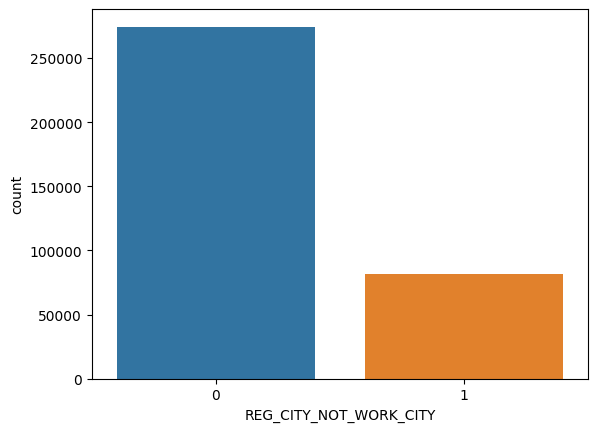

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#data = pd.read_csv('creditcard.csv')
#display(data)
display(app.REG_CITY_NOT_WORK_CITY.value_counts())

g = sns.countplot(x=app.REG_CITY_NOT_WORK_CITY)
#g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

NAME_CONTRACT_TYPE
Cash loans         326537
Revolving loans     29718
Name: count, dtype: int64

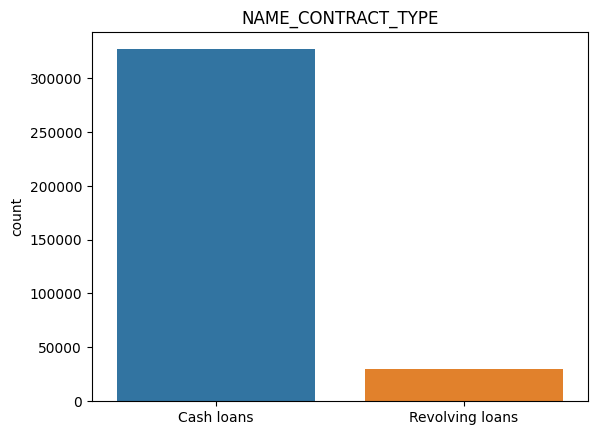

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

display(app.NAME_CONTRACT_TYPE.value_counts())

g = sns.countplot(x=app.NAME_CONTRACT_TYPE)
plt.title("NAME_CONTRACT_TYPE")
plt.xlabel("")
#g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.178670
WEDNESDAY    0.169516
MONDAY       0.165949
THURSDAY     0.165637
FRIDAY       0.161648
SATURDAY     0.107942
SUNDAY       0.050638
Name: proportion, dtype: float64

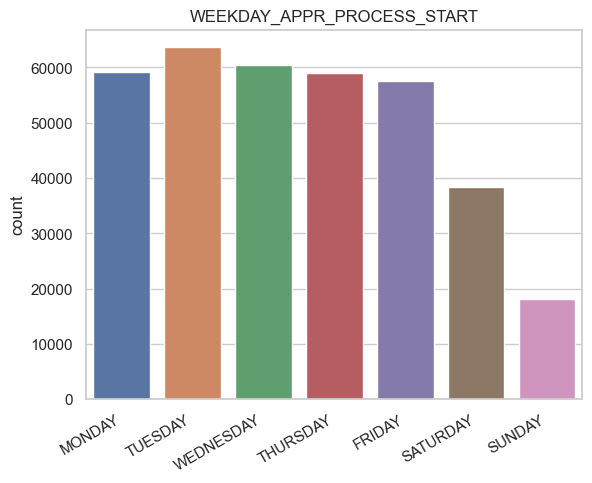

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

display(app.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True))

g = sns.countplot(
    x=app.WEEKDAY_APPR_PROCESS_START,
    order=["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"]
)
plt.title("WEEKDAY_APPR_PROCESS_START")
plt.xlabel("")
# Rotate x-axis labels
plt.xticks(rotation=30, ha='right')
#g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [ ]:
# créer la figure et les plots et faire un affichage multiple pour un lot.

# On passe la table, la liste des colonnes et c'est parti.

# Le but, faire des blocs intelligents

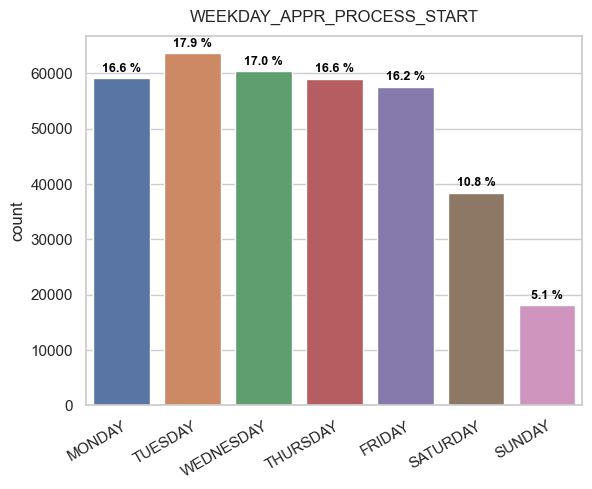

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_cat_mod_counts(cat, order=None, ax=None, rotate_labels=True):
    ax_out = sns.countplot(x=cat, order=order, ax=ax)

    ax_out.set_title(cat.name, pad=10)
    ax_out.set_xlabel("")
    # Rotate x-axis labels
    if rotate_labels:
        #ax_out.tick_params(axis='x', labelrotation=30) #, labelright=True)
        # Rotate the tick labels and set their alignment.
        plt.setp(ax_out.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
    
    # Add relative frequency values above bars
    total = float(len(cat))  # total number of observations
    for p in ax_out.patches:
        height = p.get_height()  # get the height of each bar which is the count
        pct = 100 * height / total  # calculate the relative frequency in percentage
        ax_out.annotate(
            f'{pct:.1f} %', (p.get_x() + p.get_width() / 2., height), 
            ha='center', va='center', fontsize=9, weight="bold", color='black', 
            xytext=(0, 7), textcoords='offset points'
        )
    if ax is None:
        plt.show()

    """
        if fig is not None:
        fig.tight_layout()
        # plt.show()
        title = "Jane DOE"
        save_and_show(f"rgb_to_hsv_{title.lower()}", sub_dir="im_prep")
    """


show_cat_mod_counts(
    app.WEEKDAY_APPR_PROCESS_START,
    order=["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"]
)

Maintenant, je veux une grille avec toutes les catégories binaires, avec rappel de la définition en sous-titre.
Le must serait l'indication des quantités en %

In [18]:
bin_cats = modalities[modalities.n_u == 2].copy()
print(len(bin_cats))
display(bin_cats)

35


,dtype,n_u,modalities
application,,,
NAME_CONTRACT_TYPE,object,2,"[Cash loans, Revolving loans]"
FLAG_OWN_CAR,object,2,"[N, Y]"
FLAG_OWN_REALTY,object,2,"[N, Y]"
FLAG_MOBIL,int64,2,"[0, 1]"
FLAG_EMP_PHONE,int64,2,"[0, 1]"
FLAG_WORK_PHONE,int64,2,"[0, 1]"
FLAG_CONT_MOBILE,int64,2,"[0, 1]"
FLAG_PHONE,int64,2,"[0, 1]"
FLAG_EMAIL,int64,2,"[0, 1]"


In [22]:
import numpy as np
x = np.arange(len(bin_cats))
print(len(bin_cats))
display(list(zip(x, bin_cats.index)))

35


[(0, 'NAME_CONTRACT_TYPE'),
 (1, 'FLAG_OWN_CAR'),
 (2, 'FLAG_OWN_REALTY'),
 (3, 'FLAG_MOBIL'),
 (4, 'FLAG_EMP_PHONE'),
 (5, 'FLAG_WORK_PHONE'),
 (6, 'FLAG_CONT_MOBILE'),
 (7, 'FLAG_PHONE'),
 (8, 'FLAG_EMAIL'),
 (9, 'REG_REGION_NOT_LIVE_REGION'),
 (10, 'REG_REGION_NOT_WORK_REGION'),
 (11, 'LIVE_REGION_NOT_WORK_REGION'),
 (12, 'REG_CITY_NOT_LIVE_CITY'),
 (13, 'REG_CITY_NOT_WORK_CITY'),
 (14, 'LIVE_CITY_NOT_WORK_CITY'),
 (15, 'FLAG_DOCUMENT_2'),
 (16, 'FLAG_DOCUMENT_3'),
 (17, 'FLAG_DOCUMENT_4'),
 (18, 'FLAG_DOCUMENT_5'),
 (19, 'FLAG_DOCUMENT_6'),
 (20, 'FLAG_DOCUMENT_7'),
 (21, 'FLAG_DOCUMENT_8'),
 (22, 'FLAG_DOCUMENT_9'),
 (23, 'FLAG_DOCUMENT_10'),
 (24, 'FLAG_DOCUMENT_11'),
 (25, 'FLAG_DOCUMENT_12'),
 (26, 'FLAG_DOCUMENT_13'),
 (27, 'FLAG_DOCUMENT_14'),
 (28, 'FLAG_DOCUMENT_15'),
 (29, 'FLAG_DOCUMENT_16'),
 (30, 'FLAG_DOCUMENT_17'),
 (31, 'FLAG_DOCUMENT_18'),
 (32, 'FLAG_DOCUMENT_19'),
 (33, 'FLAG_DOCUMENT_20'),
 (34, 'FLAG_DOCUMENT_21')]

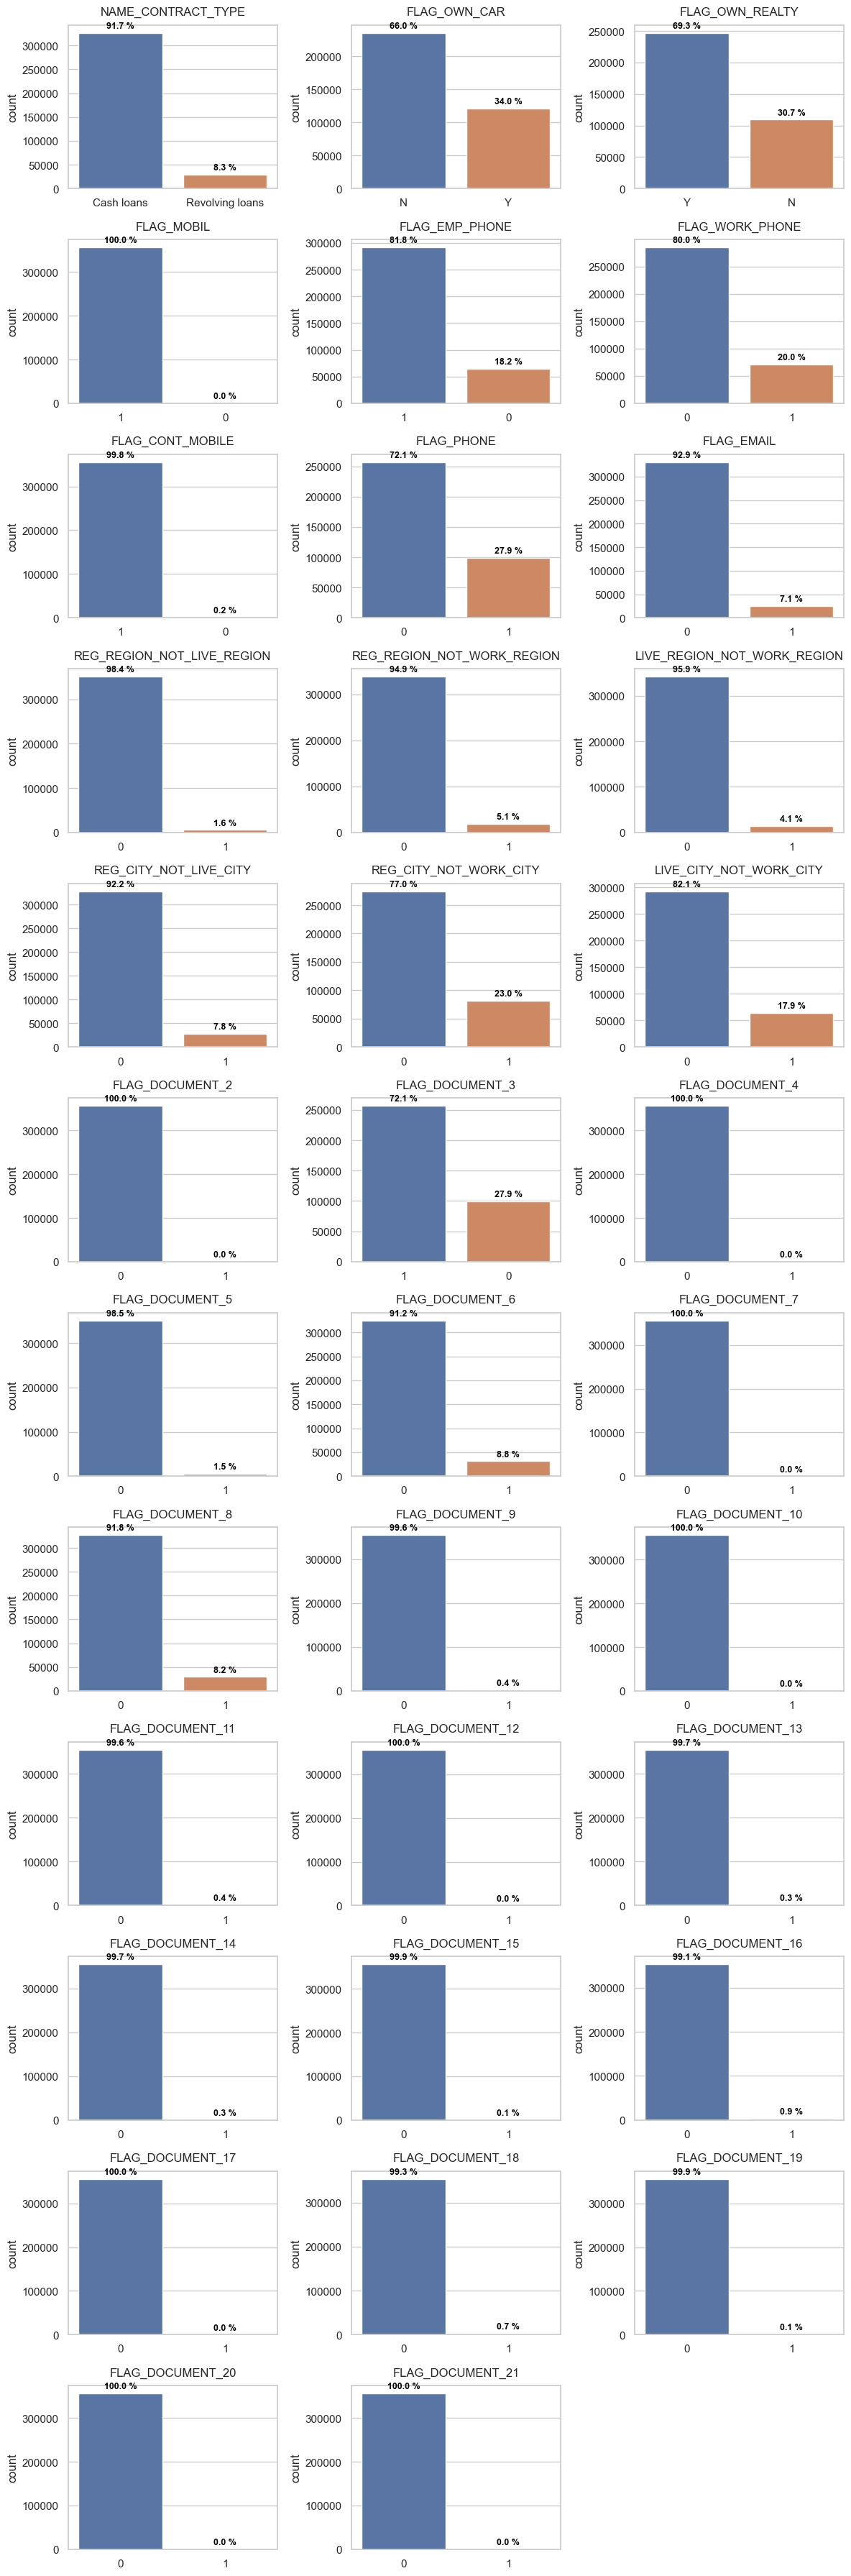

In [96]:
from home_credit.plots import show_cat_mod_counts_gallery
show_cat_mod_counts_gallery(app, bin_cats.index, ncols=3, rotate_labels=False)

In [97]:
mod_3_10_cats = modalities[(2 < modalities.n_u) & (modalities.n_u < 11)].copy()
print(len(mod_3_10_cats))
display(mod_3_10_cats)

18


,dtype,n_u,modalities
application,,,
TARGET,int64,3,"[-1, 0, 1]"
CODE_GENDER,object,3,"[F, M, XNA]"
NAME_TYPE_SUITE,object,8,"[Children, Family, Group of people, Other_A, O..."
NAME_INCOME_TYPE,object,8,"[Businessman, Commercial associate, Maternity ..."
NAME_EDUCATION_TYPE,object,5,"[Academic degree, Higher education, Incomplete..."
NAME_FAMILY_STATUS,object,6,"[Civil marriage, Married, Separated, Single / ..."
NAME_HOUSING_TYPE,object,6,"[Co-op apartment, House / apartment, Municipal..."
REGION_RATING_CLIENT,int64,3,"[1, 2, 3]"
REGION_RATING_CLIENT_W_CITY,int64,4,"[-1, 1, 2, 3]"


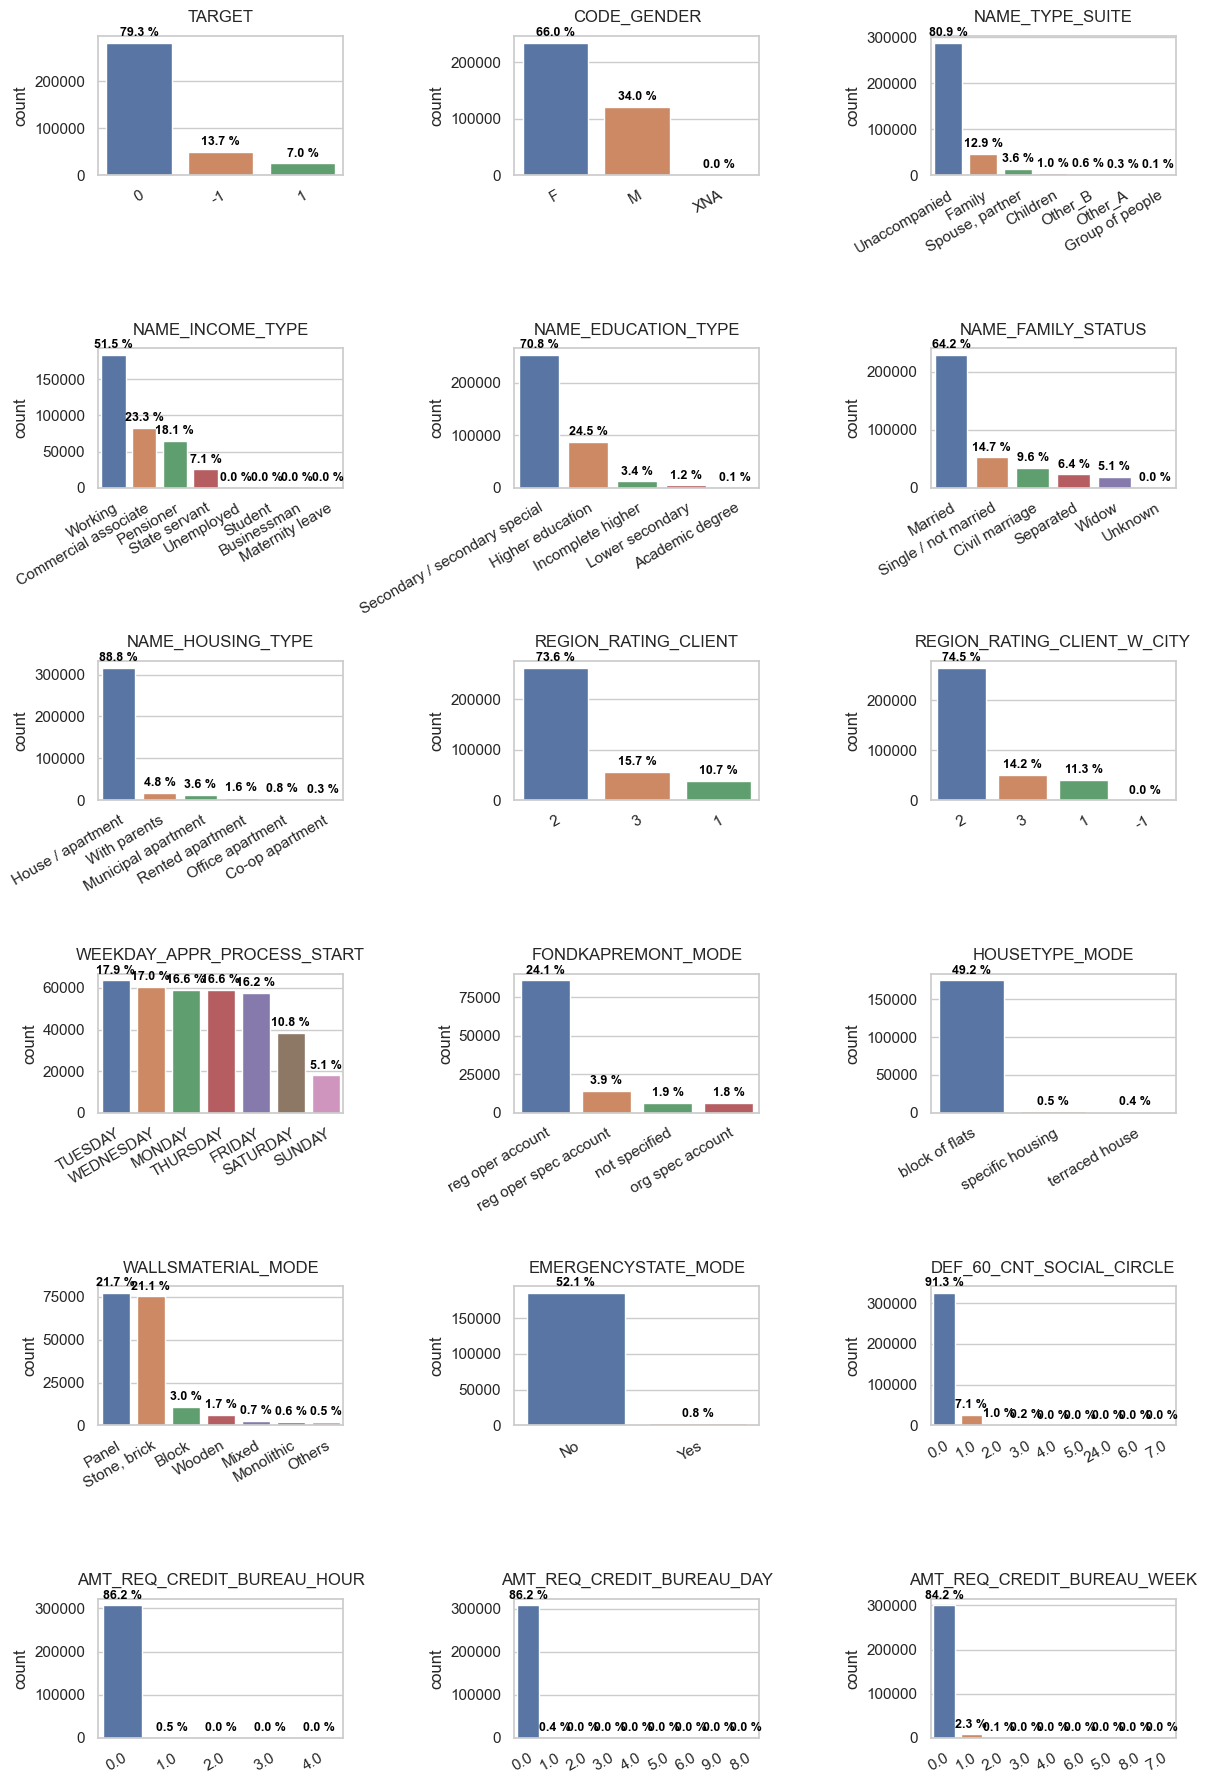

In [98]:
show_cat_mod_counts_gallery(app, mod_3_10_cats.index, ncols=3)

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
"""
def show_cat_mod_counts_v2(cat, order=None, ax=None, rotate_labels=True):
    ax_out = None
    if ax is None:
        figsize = (max(10, cat.nunique()), 6)
        _, ax_out = plt.subplots(figsize=figsize)
    else:
        ax_out = ax

    ax_out = sns.countplot(x=cat, order=order, ax=ax)

    ax_out.set_title(cat.name, pad=10)
    ax_out.set_xlabel("")
    # Rotate x-axis labels
    if rotate_labels:
        # Rotate the tick labels and set their alignment.
        plt.setp(ax_out.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
    
    # Add relative frequency values above bars
    total = float(len(cat))  # total number of observations
    for p in ax_out.patches:
        height = p.get_height()  # get the height of each bar which is the count
        pct = 100 * height / total  # calculate the relative frequency in percentage
        ax_out.annotate(
            f'{pct:.1f} %', (p.get_x() + p.get_width() / 2., height), 
            ha='center', va='center', fontsize=9, weight="bold", color='black', 
            xytext=(0, 7), textcoords='offset points'
        )
    if ax is None:
        plt.show()
        """

    """
        if fig is not None:
        fig.tight_layout()
        # plt.show()
        title = "Jane DOE"
        save_and_show(f"rgb_to_hsv_{title.lower()}", sub_dir="im_prep")
    """

11


,dtype,n_u,modalities
application,,,
CNT_CHILDREN,int64,16,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,..."
OCCUPATION_TYPE,object,19,"[Accountants, Cleaning staff, Cooking staff, C..."
CNT_FAM_MEMBERS,float64,19,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
HOUR_APPR_PROCESS_START,int64,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
ELEVATORS_MODE,float64,27,"[0.0, 0.0403, 0.0806, 0.1208, 0.1611, 0.2014, ..."
FLOORSMAX_MODE,float64,26,"[0.0, 0.0417, 0.0833, 0.125, 0.1667, 0.2083, 0..."
FLOORSMIN_MODE,float64,26,"[0.0, 0.0417, 0.0833, 0.125, 0.1667, 0.2083, 0..."
DEF_30_CNT_SOCIAL_CIRCLE,float64,11,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,float64,25,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."



CNT_CHILDREN
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|CNT_CHILDREN|Number of children the client has|_|

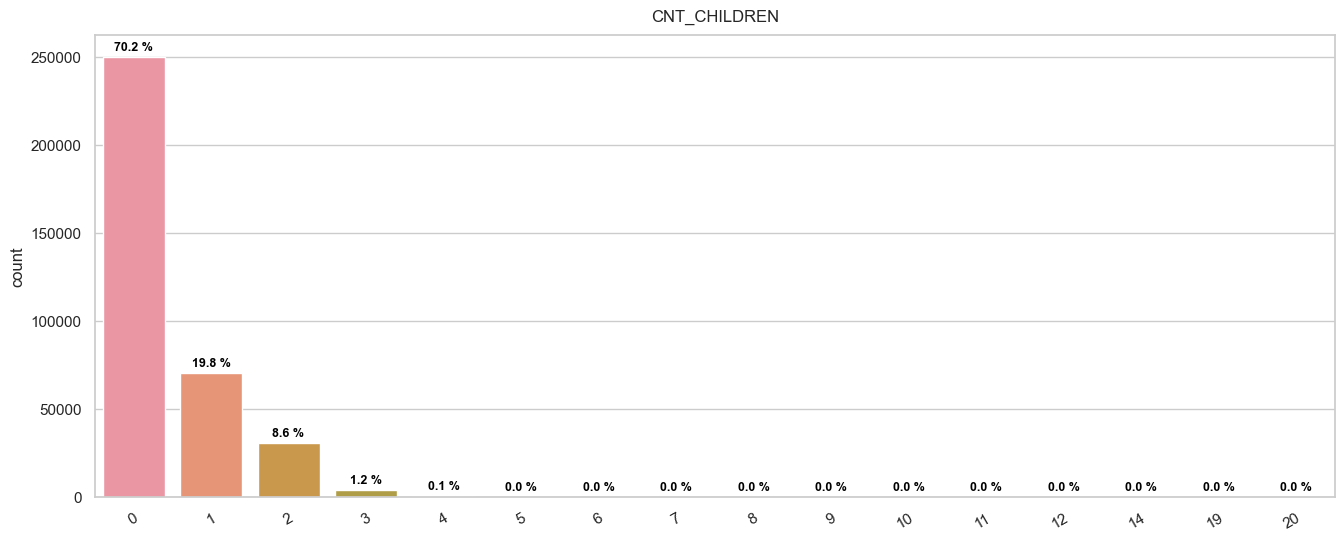


OCCUPATION_TYPE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|OCCUPATION_TYPE|What kind of occupation does the client have|_|

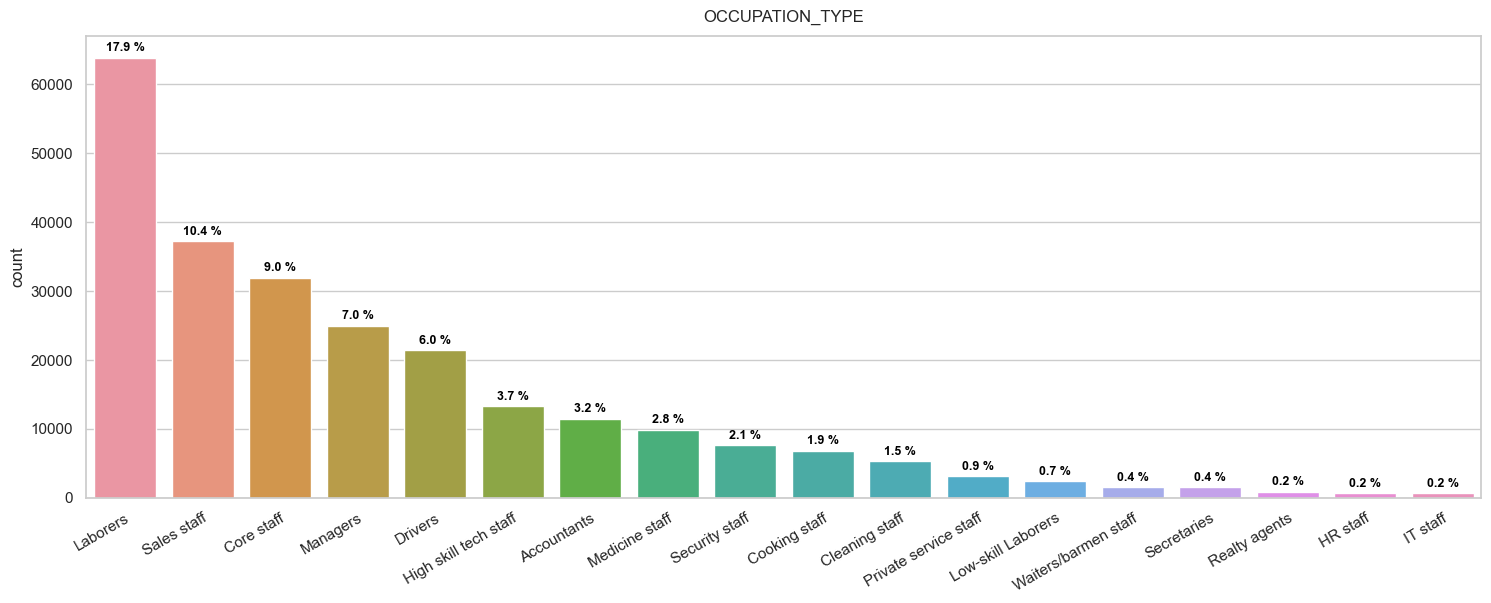


CNT_FAM_MEMBERS


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|CNT_FAM_MEMBERS|How many family members does client have|_|

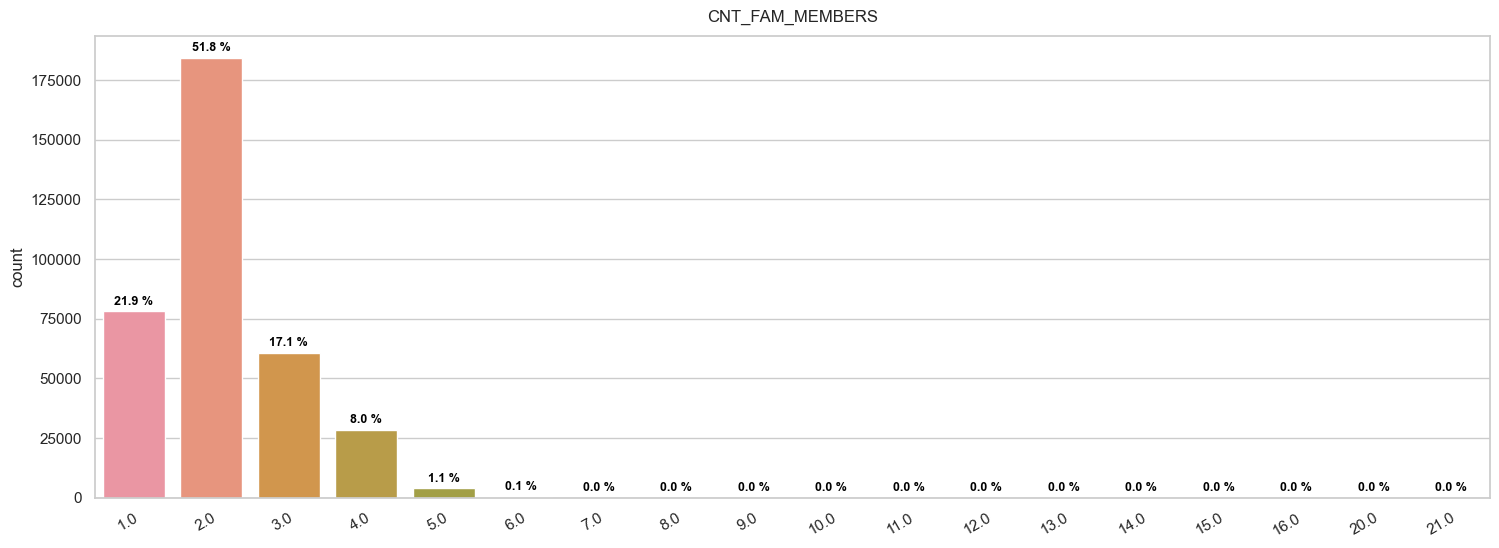


HOUR_APPR_PROCESS_START


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|HOUR_APPR_PROCESS_START|Approximately at what hour did the client apply for the loan|rounded|
previous_application|HOUR_APPR_PROCESS_START|Approximately at what day hour did the client apply for the previous application|rounded|

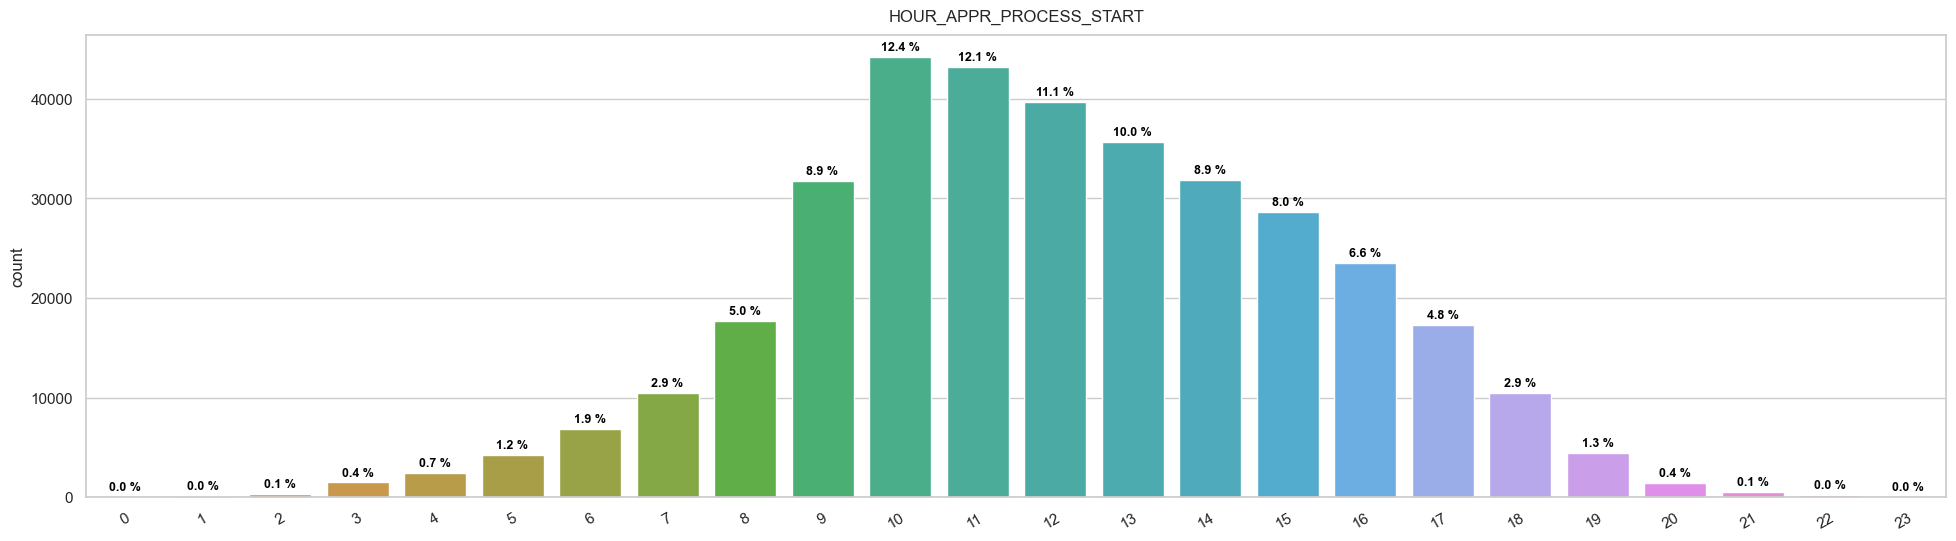


ELEVATORS_MODE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|ELEVATORS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

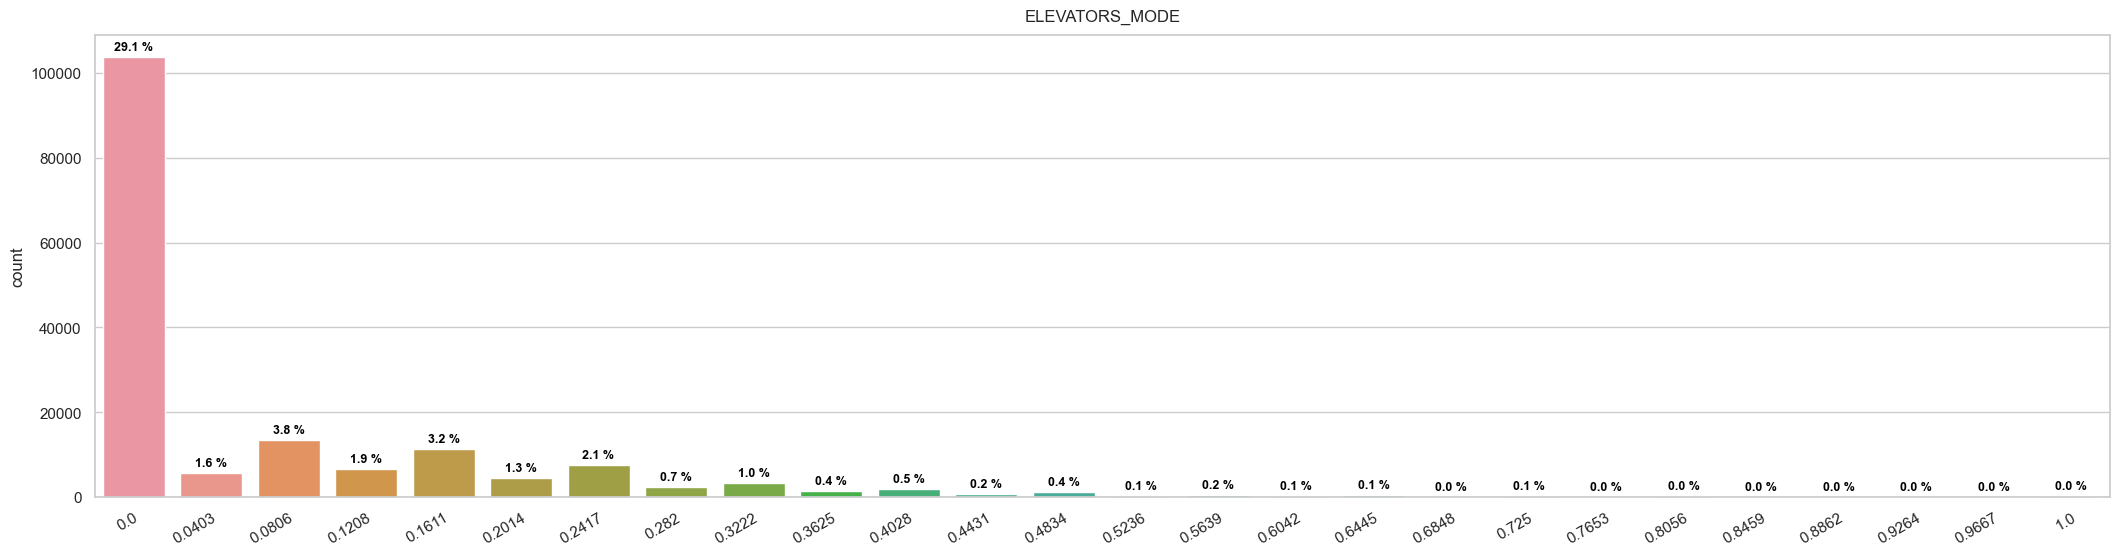


FLOORSMAX_MODE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|FLOORSMAX_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

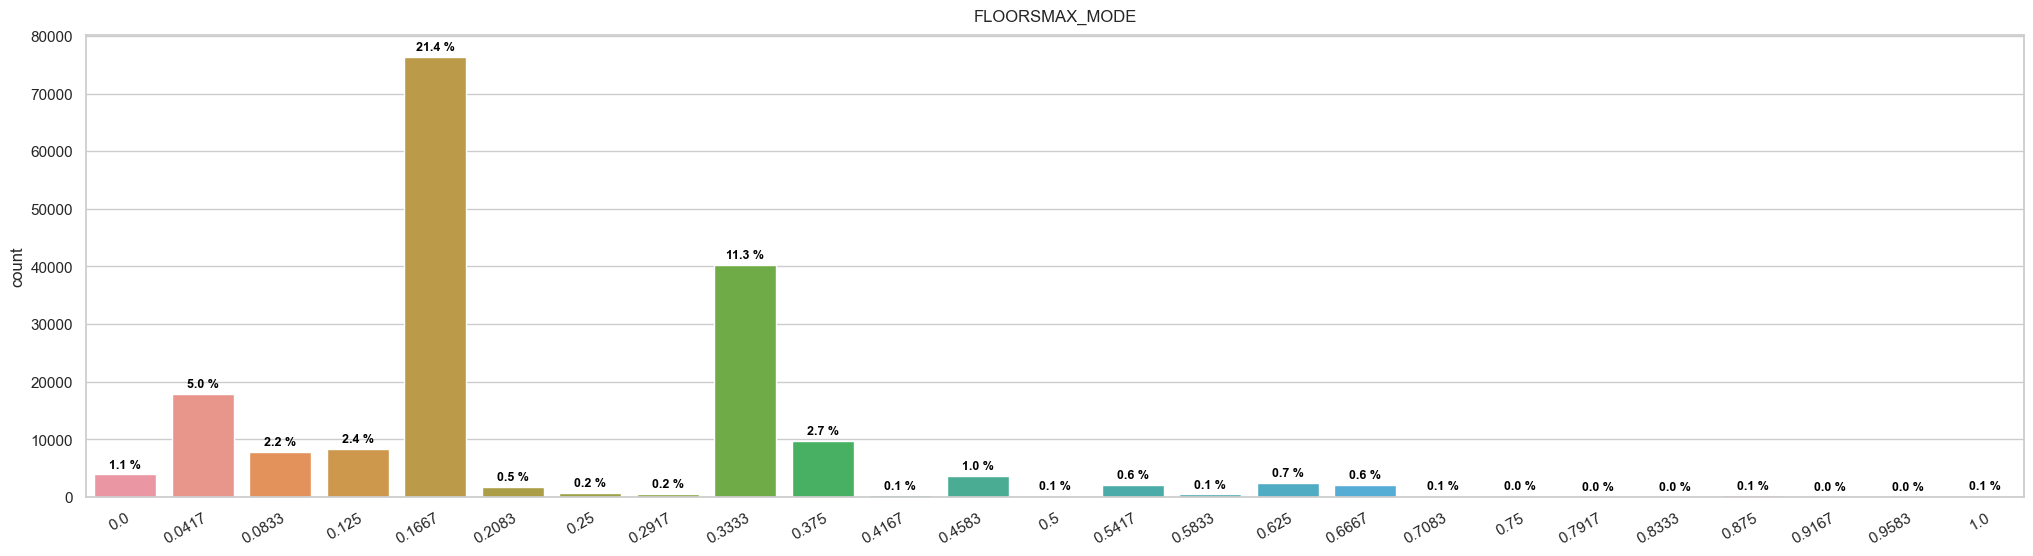


FLOORSMIN_MODE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|FLOORSMIN_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

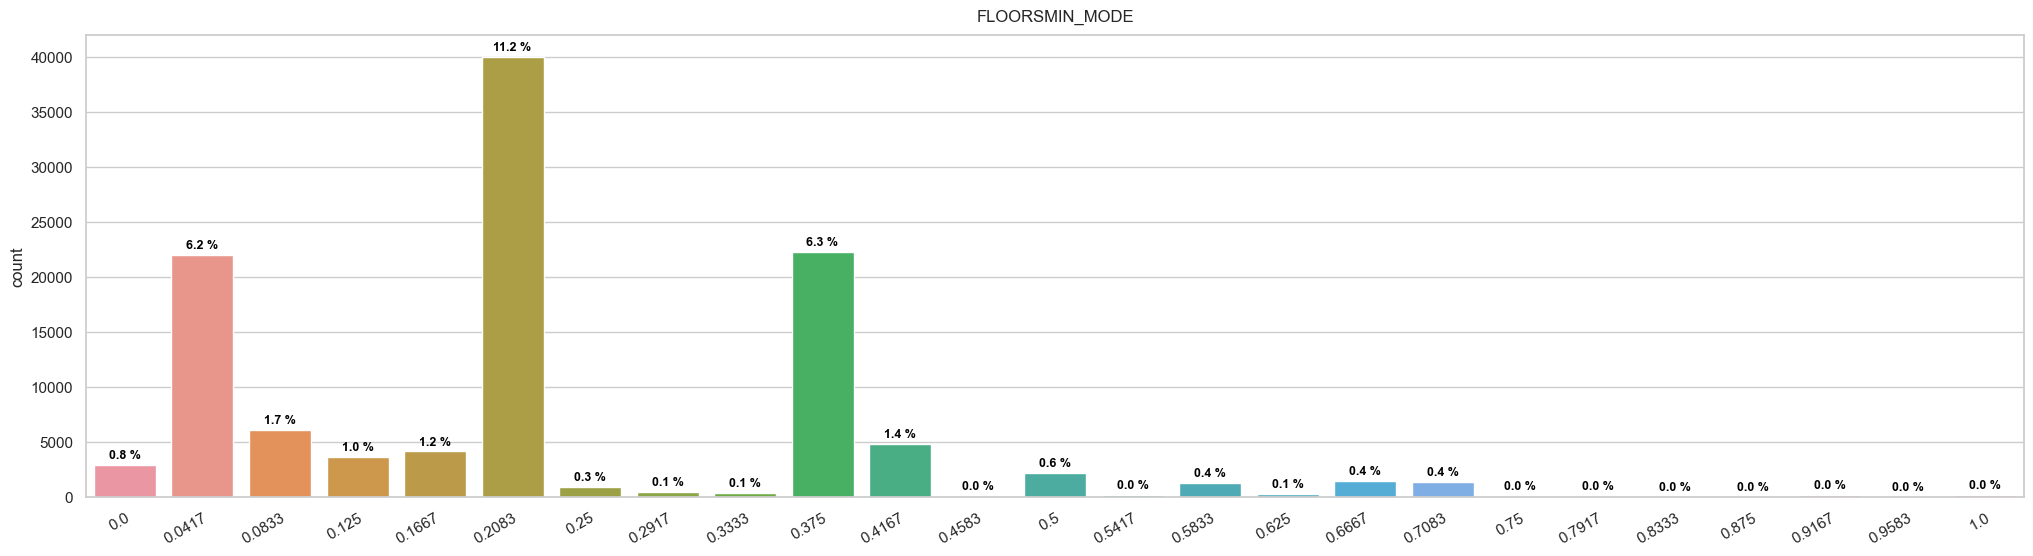


DEF_30_CNT_SOCIAL_CIRCLE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|DEF_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 30 DPD (days past due) |_|

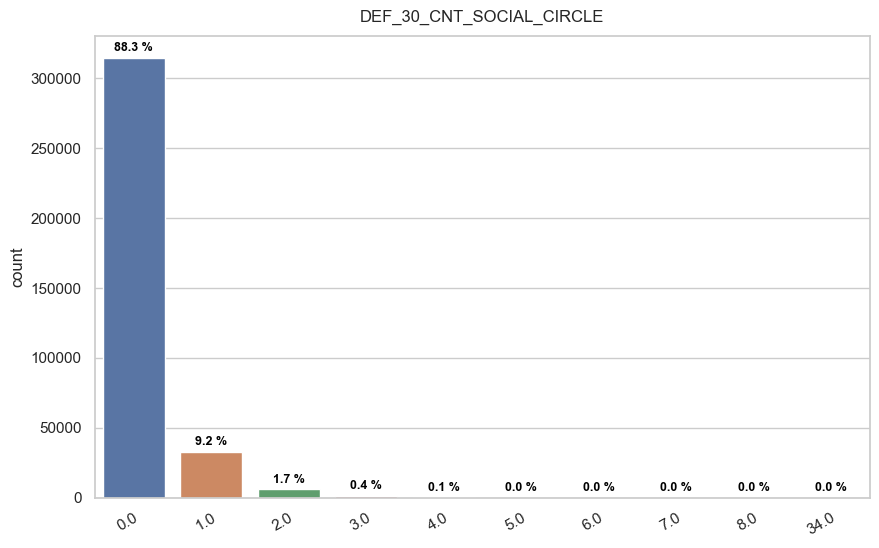


AMT_REQ_CREDIT_BUREAU_MON


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)|_|

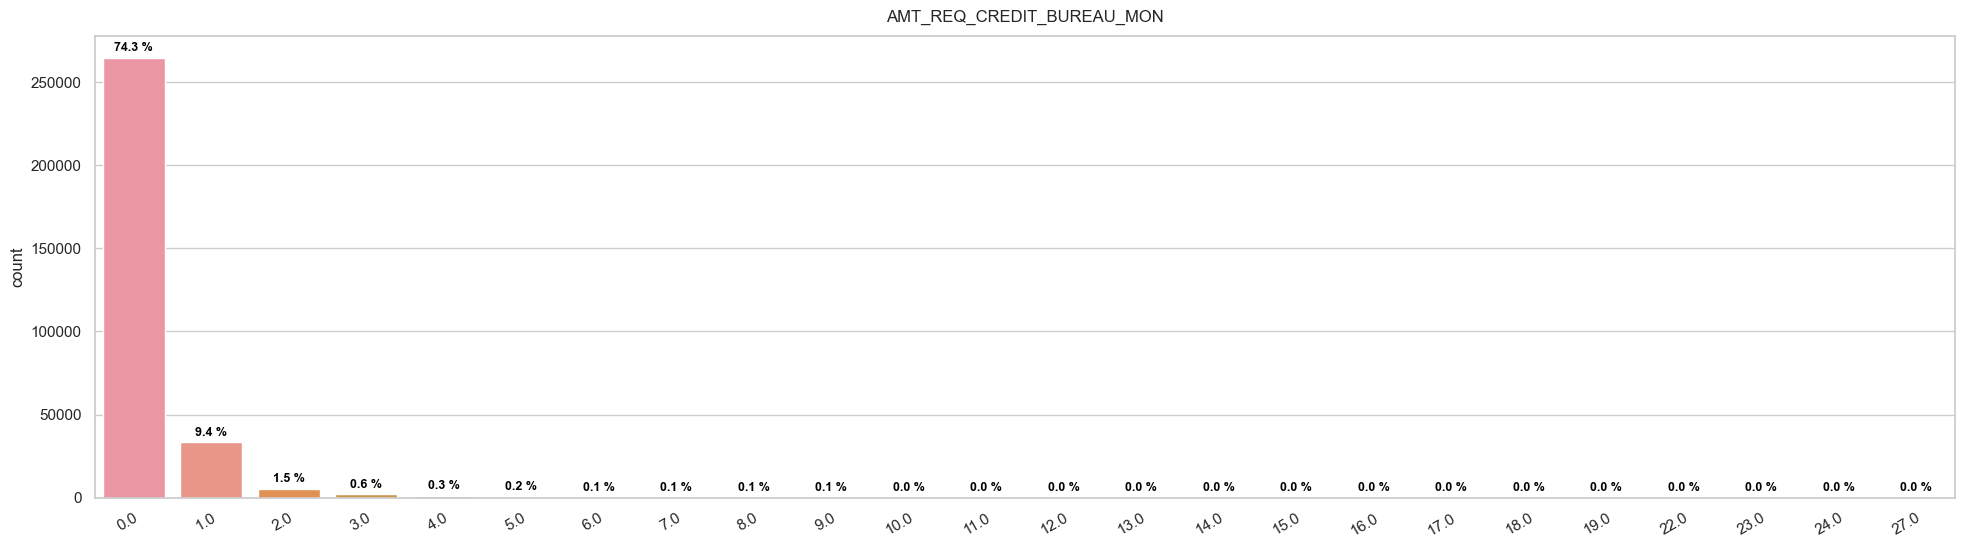


AMT_REQ_CREDIT_BUREAU_QRT


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_QRT|Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)|_|

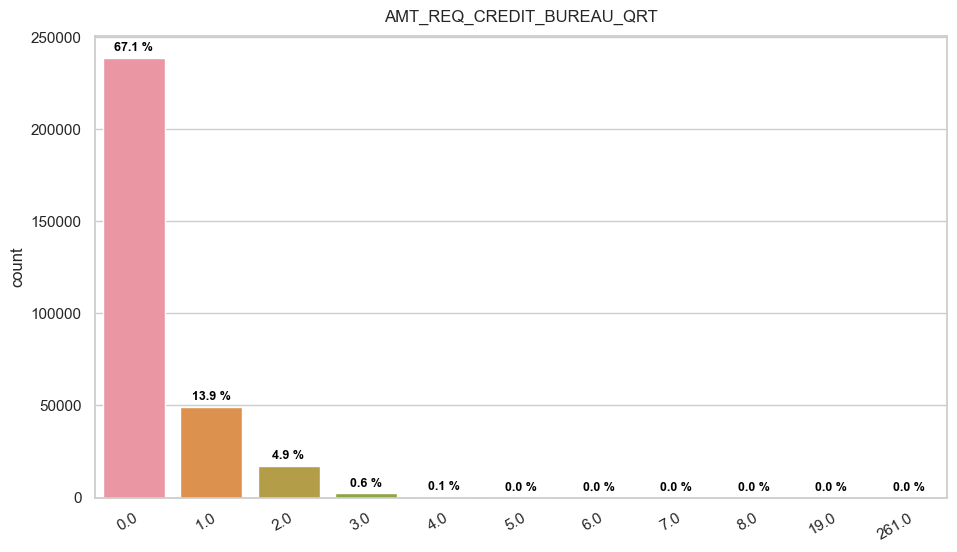


AMT_REQ_CREDIT_BUREAU_YEAR


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)|_|

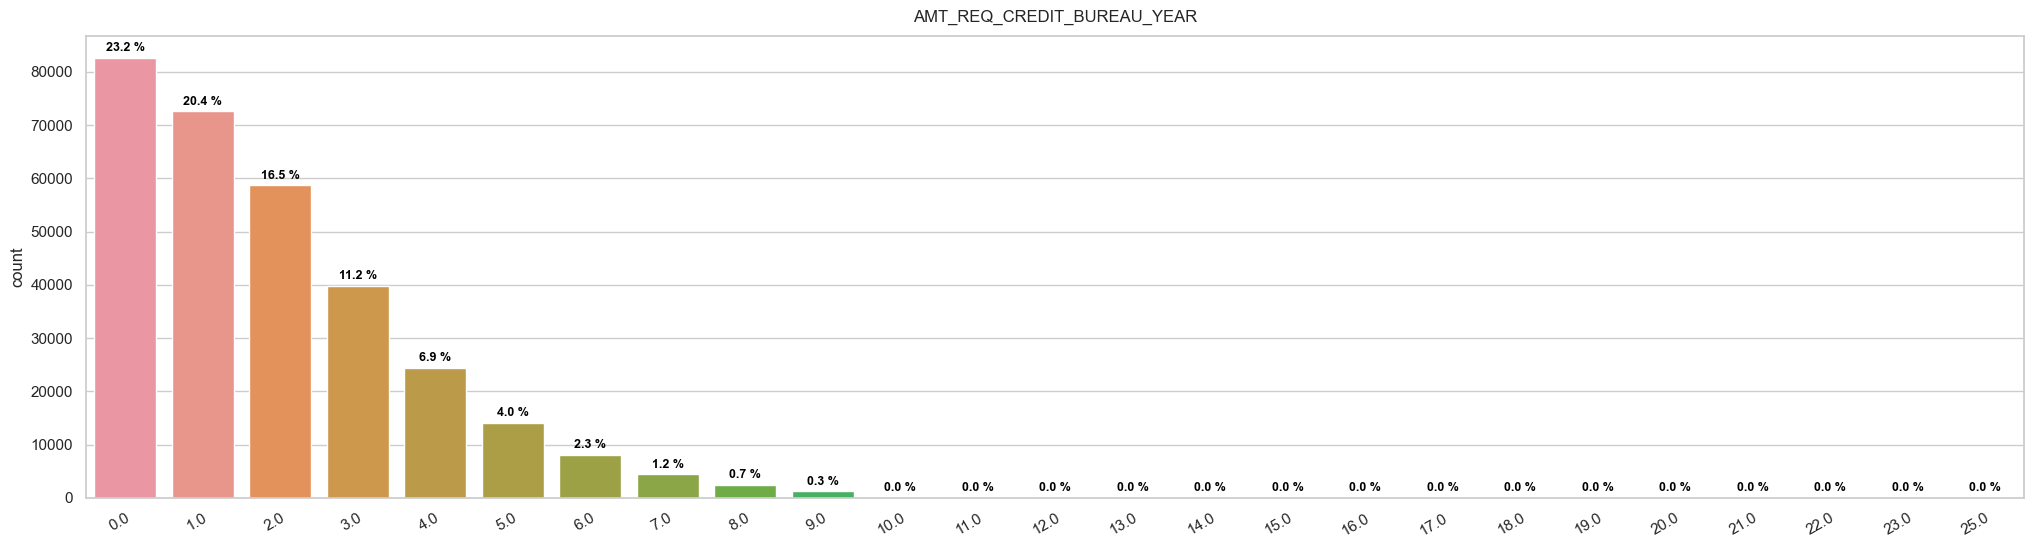

In [110]:
from pepper.utils import print_subtitle
from home_credit.utils import help_cols
from home_credit.plots import show_cat_mod_counts

mod_11_30_cats = modalities[(10 < modalities.n_u) & (modalities.n_u < 31)].copy()
print(len(mod_11_30_cats))
display(mod_11_30_cats)

for cat in mod_11_30_cats.index:
    #show_cat_mod_counts_gallery(app, mod_11_30_cats.index, ncols=2)
    print_subtitle(cat)
    help_cols(cat)
    order = None
    if app[cat].dtype in [str, object]:
        order = app[cat].value_counts().index
    show_cat_mod_counts(
        app[cat],
        order=order
        # order auto pour les ordinaux
        # order=["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"]
    )

10


,dtype,n_u,modalities
application,,,
REGION_POPULATION_RELATIVE,float64,82,"[0.0002529999999999, 0.00029, 0.000533, 0.0009..."
OWN_CAR_AGE,float64,64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
ORGANIZATION_TYPE,object,58,"[Advertising, Agriculture, Bank, Business Enti..."
ENTRANCES_MODE,float64,31,"[0.0, 0.0345, 0.069, 0.1034, 0.1379, 0.1724, 0..."
ELEVATORS_MEDI,float64,47,"[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,..."
ENTRANCES_MEDI,float64,47,"[0.0, 0.0172, 0.0345, 0.0517, 0.069, 0.0862, 0..."
FLOORSMAX_MEDI,float64,50,"[0.0, 0.0208, 0.0417, 0.0625, 0.0833, 0.1042, ..."
FLOORSMIN_MEDI,float64,48,"[0.0, 0.0208, 0.0417, 0.0625, 0.0833, 0.1042, ..."
OBS_30_CNT_SOCIAL_CIRCLE,float64,37,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."



REGION_POPULATION_RELATIVE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|REGION_POPULATION_RELATIVE|Normalized population of region where client lives (higher number means the client lives in more populated region)|normalized |

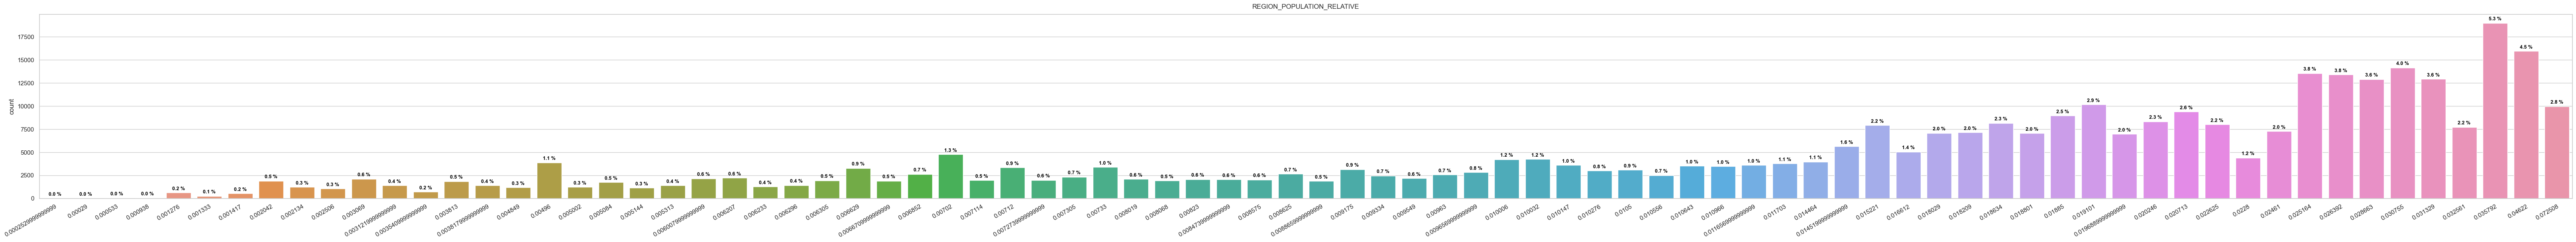


OWN_CAR_AGE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|OWN_CAR_AGE|Age of client's car|_|

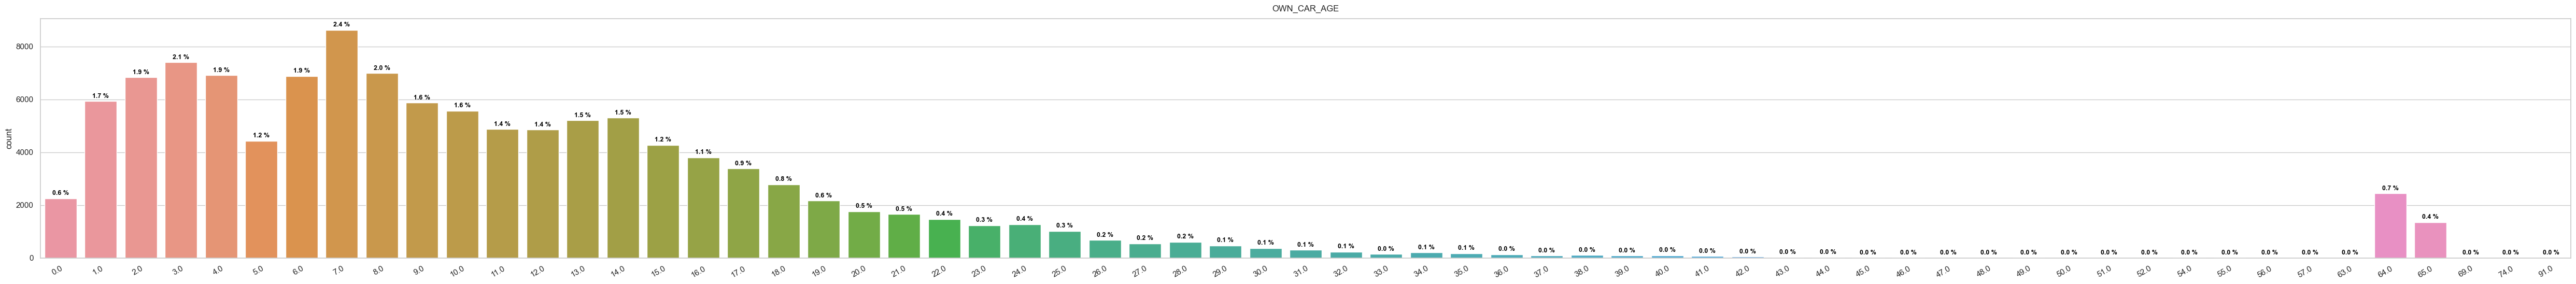


ORGANIZATION_TYPE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|ORGANIZATION_TYPE|Type of organization where client works|_|

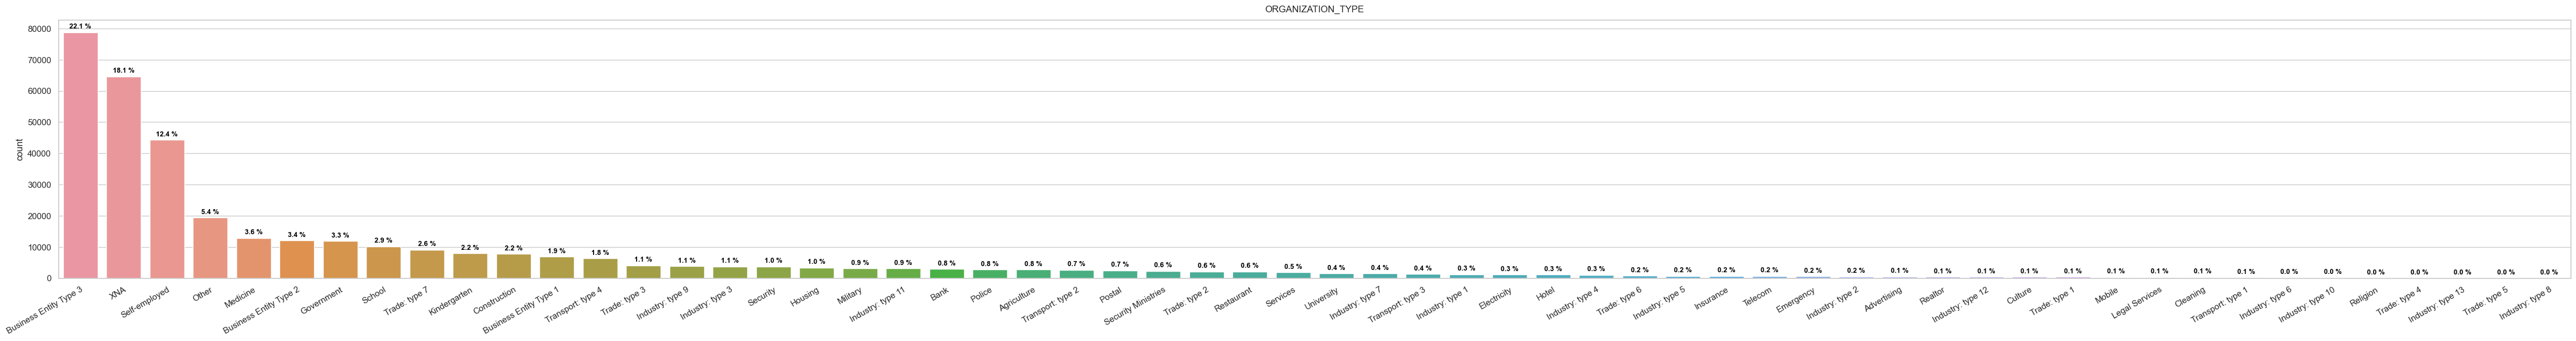


ENTRANCES_MODE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|ENTRANCES_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

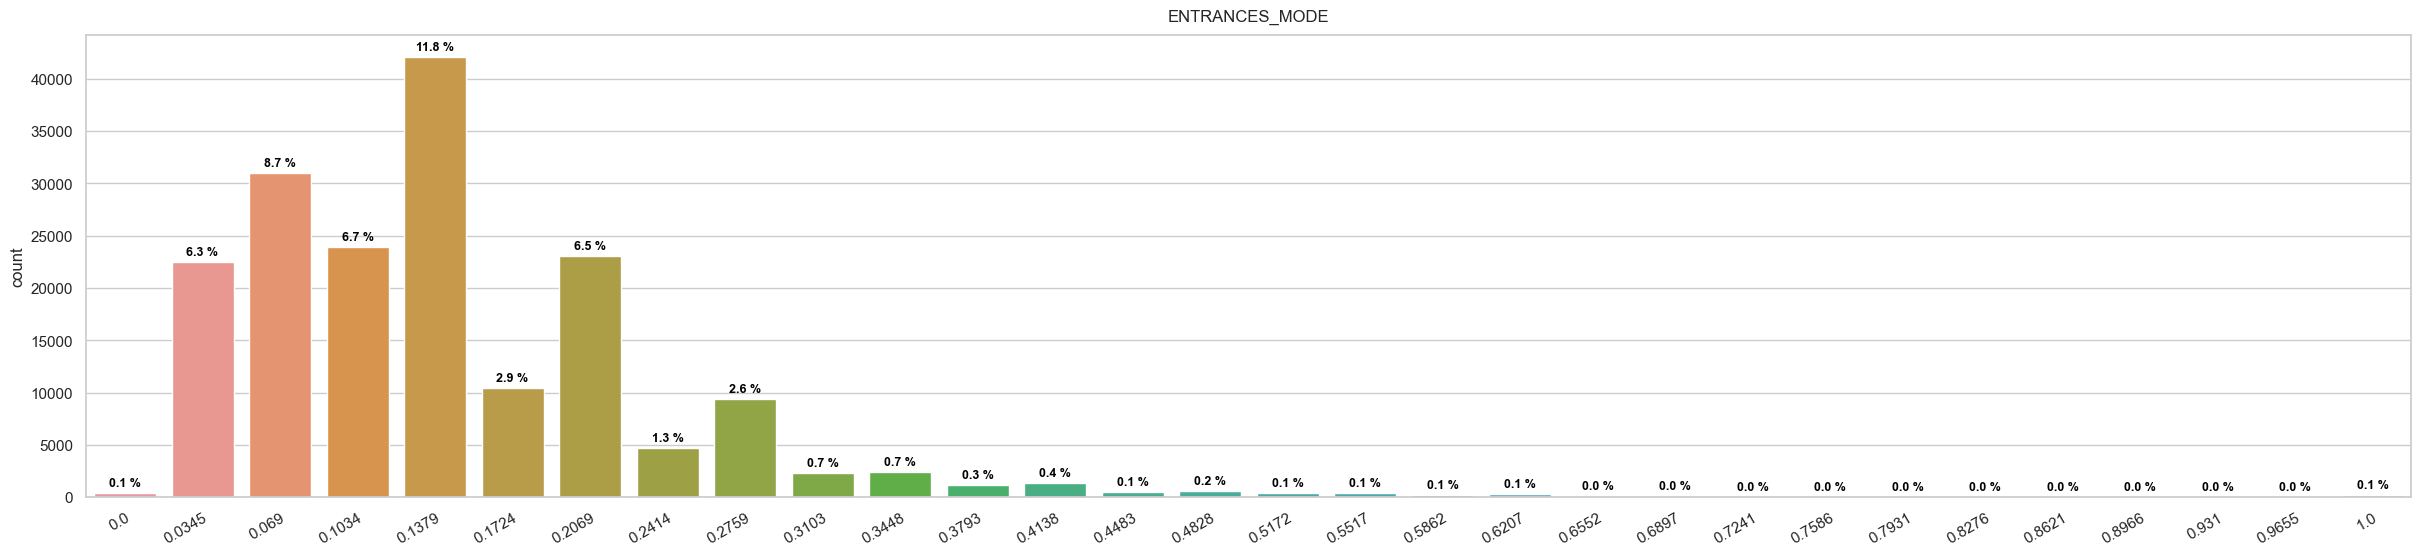


ELEVATORS_MEDI


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|ELEVATORS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

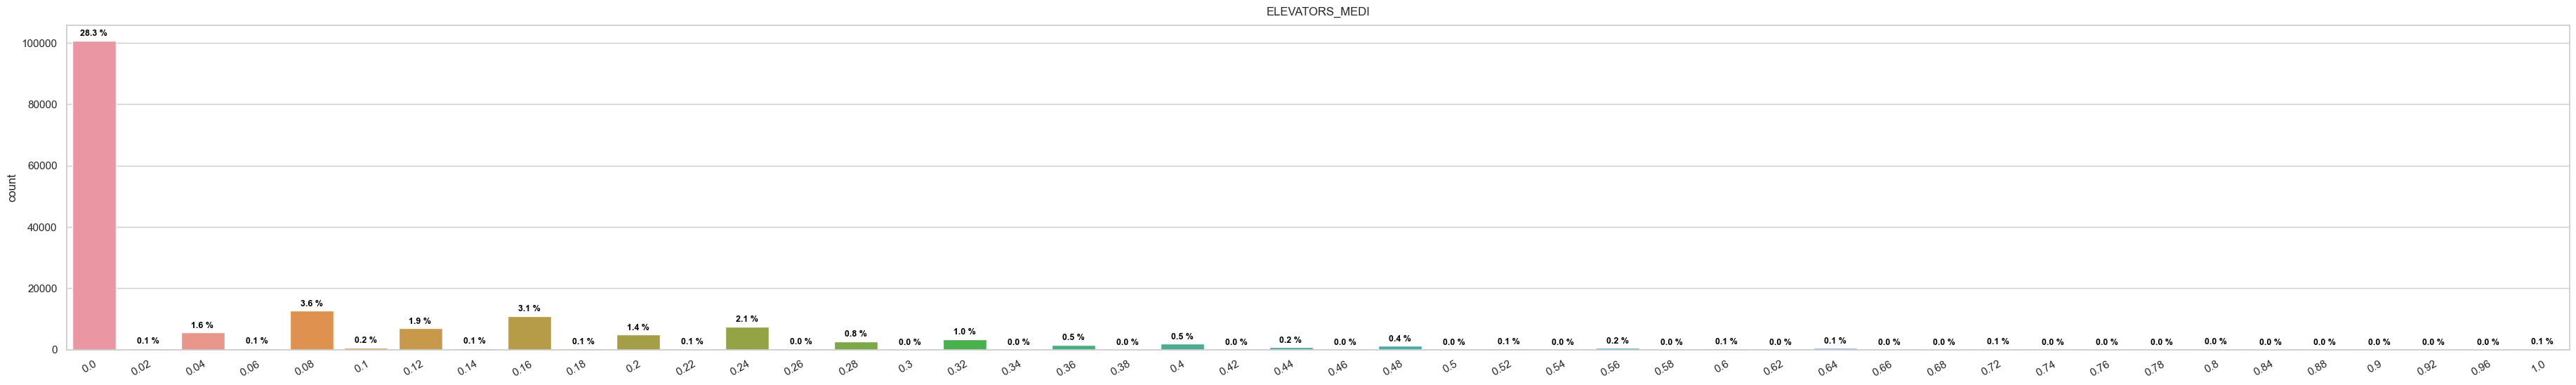


ENTRANCES_MEDI


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|ENTRANCES_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

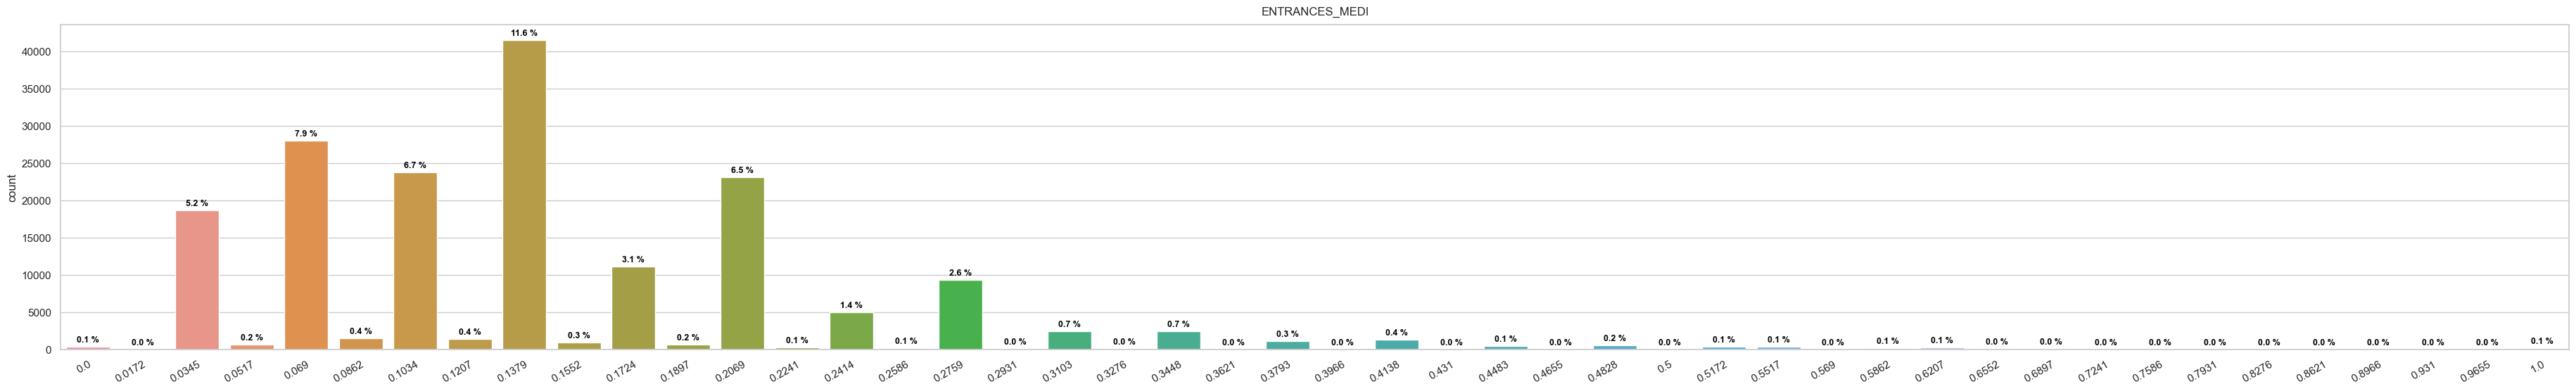


FLOORSMAX_MEDI


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|FLOORSMAX_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

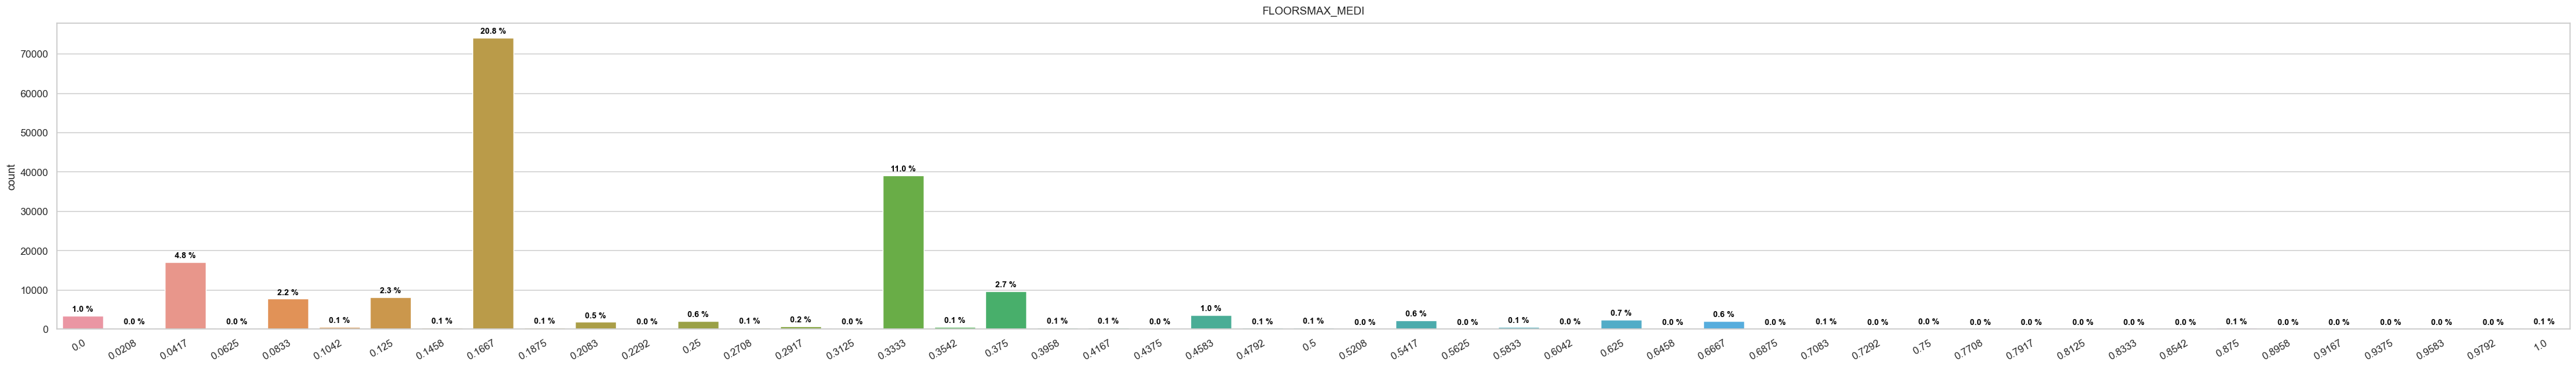


FLOORSMIN_MEDI


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|FLOORSMIN_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

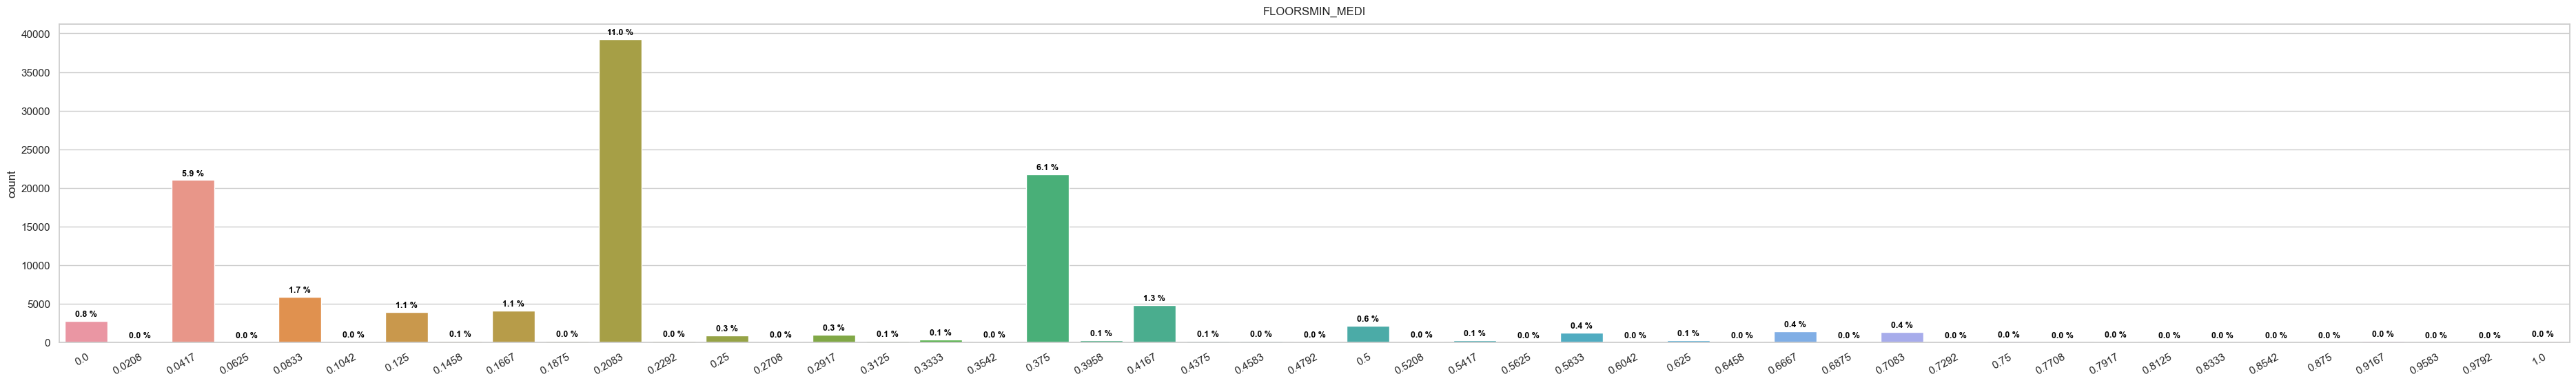


OBS_30_CNT_SOCIAL_CIRCLE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|OBS_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 30 DPD (days past due) default|_|

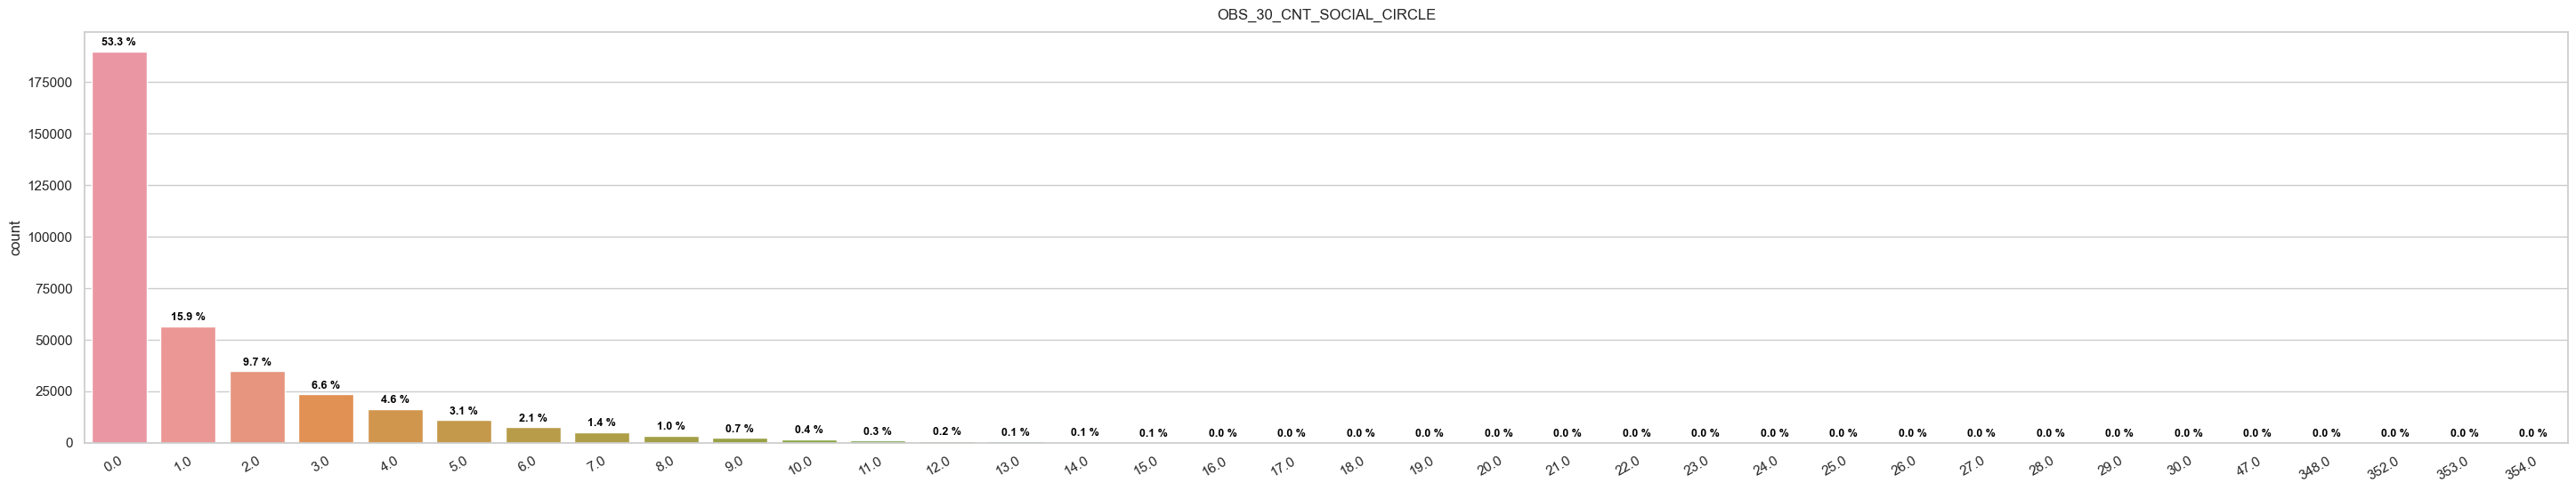


OBS_60_CNT_SOCIAL_CIRCLE


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|OBS_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 60 DPD (days past due) default|_|

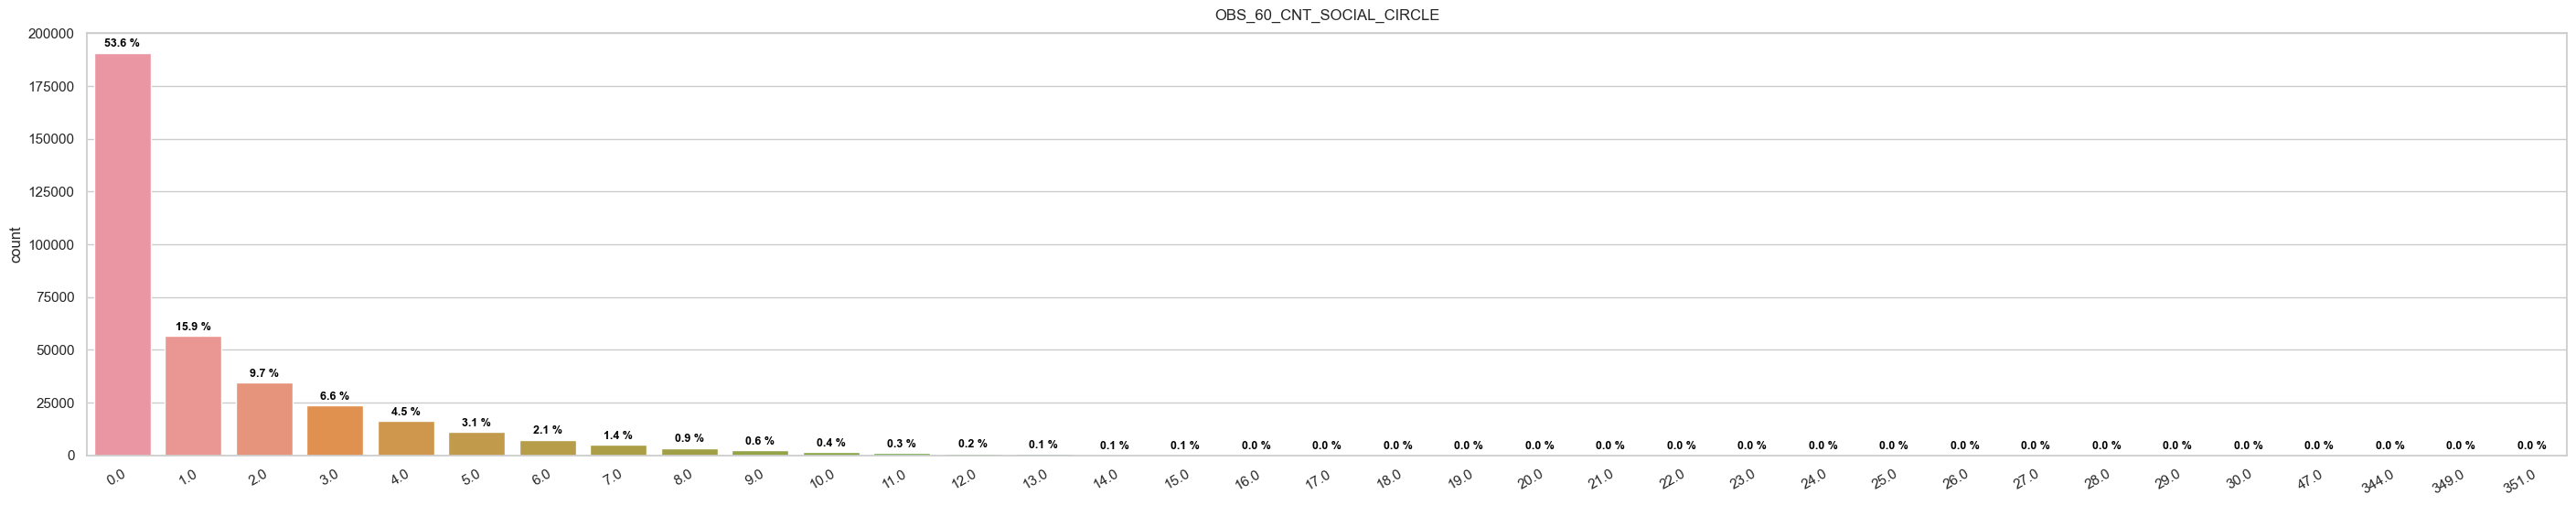

In [111]:
mod_31_100_cats = modalities[(30 < modalities.n_u) & (modalities.n_u < 101)].copy()
print(len(mod_31_100_cats))
display(mod_31_100_cats)

for cat in mod_31_100_cats.index:
    #show_cat_mod_counts_gallery(app, mod_11_30_cats.index, ncols=2)
    print_subtitle(cat)
    help_cols(cat)
    order = None
    if app[cat].dtype in [str, object]:
        order = app[cat].value_counts().index
    show_cat_mod_counts_v2(
        app[cat],
        order=order
        # order auto pour les ordinaux
        # order=["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"]
    )

# Annexe : dictionnaire des données

Du old à dépoussiérer.

In [1]:
from pepper.data_dict import _load_struct
s = _load_struct()
display(s)

,id,group,subgroup,name,a,abstr_type,abstr_subtype,,domain,format,unity,astype,nan_code,nap_code,desc,comment
1,0,Identification,_,OSEBuildingID,1,N,ord,3 376,[1; 50226],,,,,,Un identifiant unique attribué à chaque propri...,
2,1,Identification,_,DataYear,1,N,ord,1,[2016],,,,,,L'année civile (janvier-décembre) représentée ...,
3,2,Identification,_,BuildingType,1,L,class,8,,,,,,,Classification des types de construction de la...,
4,3,Identification,_,PrimaryPropertyType,1,L,class,24,,,,,,,L'utilisation principale d'une propriété (par ...,
5,4,Identification,_,PropertyName,1,L,cdata,3 362,,,,,,,Nom de la propriété officielle ou commune tel ...,
6,5,Location,Admin location,Address,1,L,cdata,3 354,,,,,,,Adresse de la rue Propriété,
7,6,Location,Admin location,City,1,L,nam,1,{Seattle},,,,,,Ville,
8,7,Location,Admin location,State,1,L,code,1,{WA},,,,,,État,
9,8,Location,Admin location,ZipCode,1,N,ord,55,[98006; 98272],,,,,,Code postal,
10,9,Location,Admin location,TaxParcelIdentificationNumber,1,N,ord,3 268,,,,,,,Propriété Pin du comté de King,


In [1]:
import pepper.univar as univ
from home_credit.load import get_application

app = get_application()

# Build the report dataframe
report = univ.data_report(app, 'application_data_report.csv')

display(report)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_test.pqt


,idx,group,subgroup,name,domain,format,dtype,astype,unity,is_numeric,...,mod_counts,mod_freqs,shape,ndim,empty,size,nbytes,flags,array container type,values container type
0,0,<NYI>,<NYI>,SK_ID_CURR,<NYI>,<NYI>,int64,<NYI>,<NYI>,True,...,None,None,"(356255,)",1,False,356255,2850040,<Flags(allows_duplicate_labels=True)>,<class 'pandas.core.arrays.numpy_.PandasArray'>,<class 'numpy.ndarray'>
1,1,<NYI>,<NYI>,TARGET,<NYI>,<NYI>,int64,<NYI>,<NYI>,True,...,None,None,"(356255,)",1,False,356255,2850040,<Flags(allows_duplicate_labels=True)>,<class 'pandas.core.arrays.numpy_.PandasArray'>,<class 'numpy.ndarray'>
2,2,<NYI>,<NYI>,NAME_CONTRACT_TYPE,<NYI>,<NYI>,object,<NYI>,<NYI>,False,...,"[326537, 29718, 0]","[0.9165822234073908, 0.08341777659260922, 0]","(356255,)",1,False,356255,2850040,<Flags(allows_duplicate_labels=True)>,<class 'pandas.core.arrays.numpy_.PandasArray'>,<class 'numpy.ndarray'>
3,3,<NYI>,<NYI>,CODE_GENDER,<NYI>,<NYI>,object,<NYI>,<NYI>,False,...,"[235126, 121125, 4, 0]","[0.6599935439502603, 0.33999522813714894, 1.12...","(356255,)",1,False,356255,2850040,<Flags(allows_duplicate_labels=True)>,<class 'pandas.core.arrays.numpy_.PandasArray'>,<class 'numpy.ndarray'>
4,4,<NYI>,<NYI>,FLAG_OWN_CAR,<NYI>,<NYI>,object,<NYI>,<NYI>,False,...,"[235235, 121020, 0]","[0.660299504568357, 0.33970049543164305, 0]","(356255,)",1,False,356255,2850040,<Flags(allows_duplicate_labels=True)>,<class 'pandas.core.arrays.numpy_.PandasArray'>,<class 'numpy.ndarray'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,<NYI>,<NYI>,AMT_REQ_CREDIT_BUREAU_DAY,<NYI>,<NYI>,float64,<NYI>,<NYI>,True,...,None,None,"(356255,)",1,False,356255,2850040,<Flags(allows_duplicate_labels=True)>,<class 'pandas.core.arrays.numpy_.PandasArray'>,<class 'numpy.ndarray'>
118,118,<NYI>,<NYI>,AMT_REQ_CREDIT_BUREAU_WEEK,<NYI>,<NYI>,float64,<NYI>,<NYI>,True,...,None,None,"(356255,)",1,False,356255,2850040,<Flags(allows_duplicate_labels=True)>,<class 'pandas.core.arrays.numpy_.PandasArray'>,<class 'numpy.ndarray'>
119,119,<NYI>,<NYI>,AMT_REQ_CREDIT_BUREAU_MON,<NYI>,<NYI>,float64,<NYI>,<NYI>,True,...,None,None,"(356255,)",1,False,356255,2850040,<Flags(allows_duplicate_labels=True)>,<class 'pandas.core.arrays.numpy_.PandasArray'>,<class 'numpy.ndarray'>
120,120,<NYI>,<NYI>,AMT_REQ_CREDIT_BUREAU_QRT,<NYI>,<NYI>,float64,<NYI>,<NYI>,True,...,None,None,"(356255,)",1,False,356255,2850040,<Flags(allows_duplicate_labels=True)>,<class 'pandas.core.arrays.numpy_.PandasArray'>,<class 'numpy.ndarray'>


In [2]:
display(report[report.name == "SK_ID_CURR"].T)

,0
idx,0
group,<NYI>
subgroup,<NYI>
name,SK_ID_CURR
domain,<NYI>
format,<NYI>
dtype,int64
astype,<NYI>
unity,<NYI>
is_numeric,True


In [7]:
display(app.SK_ID_CURR.mode())

0         100001
1         100002
2         100003
3         100004
4         100005
           ...  
356250    456251
356251    456252
356252    456253
356253    456254
356254    456255
Name: SK_ID_CURR, Length: 356255, dtype: int64

### Export du rapport vers GSheet

In [4]:
import pepper.univar as univ
from gspread_pandas import Spread

spread = Spread("1KP0iX6YxZO-GS0DLeqrhdRB4l1unkF2nRn0onoOlS7s")       # target GSheet
report = univ.data_report(app, "dataset_vars_analysis.csv")    # build the report dataframe
univ.data_report_to_gsheet(report, spread, 'data_dict')         # export to 'data_dict' sheet